In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# NOTES : Outline of all functions in order and useage 

### Function that loads in any coordinate velocity and mass data of a given halo and returns these as numpy array and saved .npy files

### Function that Creates radial bins and denisty hist values for a simple rho(r) plot, and also make V_dispersion Profile. These radial bins are later used to make V_disperison as well

### NOTE:  Make sure radial bins are reset so that they are in the binning value in the middle of the bin

# remember to plot the values at the middle of the bin (not the edges)

## Set the halo to be loaded for analysis

In [2]:
halo = 'juliet'   

In [3]:
import numpy as np
from random import seed
from random import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
import matplotlib as mpl

# Must use aitoff module from Case Western
import aitoff as at
from matplotlib.backends.backend_pdf import PdfPages
d = 8.3   # kpc

conversion =  ( (1.989e30  * 5.586792179e26) **2 /  ((3.086e21)**5  )  )  # Conversion from Solar masses to particle physics units
plot_bins = 80

path = "/Users/danmckeown/" 


# Functions 

# 1). 

In [4]:
def make_coords(coord_file,mass,velocities,mult_by):
    
    x = coord_file[:,0]
    y = coord_file[:,1]
    z = coord_file[:,2]  
            
    radius = np.sqrt(x*x + y*y  + z*z  )
    mask = radius <= my_rad
    radius_final = radius[mask]
    velocities_final = velocities[mask]
    velocities_final = np.asarray( velocities_final)
    part_mass = mass[0] * mult_by
    new_mass = np.zeros(len(radius_final))
    new_mass[:] = part_mass        
    x = x[mask]
    y = y[mask]
    z = z[mask]  
        
    return x,y,z,radius_final,new_mass,velocities_final,part_mass

In [367]:
def make_star_coords(coord_file,mass,velocities,mult_by):
    
    x = coord_file[:,0]
    y = coord_file[:,1]
    z = coord_file[:,2]  
            
    radius = np.sqrt(x*x + y*y  + z*z  )
    mask = radius <= my_rad
    radius_final = radius[mask]
    velocities_final = velocities[mask]
    velocities_final = np.asarray( velocities_final)
    part_mass = mass[0] * mult_by
    new_mass = np.zeros(len(radius_final))
    new_mass[:] = part_mass        
    x = x[mask]
    y = y[mask]
    z = z[mask]  
        
    return x,y,z,radius_final,new_mass,velocities_final,part_mass

# 2). 

In [5]:
def make_hist(radius,chosen_bins, masses, total_distance ):
    hist, bin_edges = np.histogram(radius, bins = chosen_bins, weights = masses, range = [0,total_distance])
    #...For Density plot                                                                                                                                                                        
    Vol = np.zeros(len(hist))
    for j in range(0, len(hist)):
        Vol[j] = 4.0/3.0* np.pi * (chosen_bins[j +1]**3 - chosen_bins[j]**3)
    
    # function adds an extra element we need to delete                                                                                                                                          
    chosen_bins_new = chosen_bins #chosen_bins[:-1]
    Den = list(map(truediv, hist, Vol))
    chosen_bins_new = np.asarray(chosen_bins_new)
    # Select the midpoint of each radial bin to plot
    chosen_bins_final =  (    chosen_bins_new[1:] + chosen_bins_new[:-1]) / 2.0 
    Den = np.asarray(Den)
    return chosen_bins_final,Den

# 3).

In [6]:
def make_velocities(velocities,radius,radial_bins,mult_by_vel):
    
    
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))

    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    velocities = velocities - v_av
    
    vx = velocities[:,0]
    vy = velocities[:,1]
    vz = velocities[:,2]
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))
    
    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    dispersion = np.zeros(radial_bins.size - 1)
 #   radial_bins = radial_bins[:-1]
    radial_bins_final =  ( radial_bins[1:] + radial_bins[:-1]) / 2.0 
    
    for i in range(1, len(radial_bins)): # Start at i = 1 since we're making shells                                                                                                                                                                        
     #   print (len(radius_dark),radial_bins_dark[i-1],radial_bins_dark[i]  )
        mask = (radius >  radial_bins[i-1]) & (radius < radial_bins[i])
        v_avg_dark = velocities[mask].mean(axis=0)
        difference_dark = velocities[mask] - v_avg_dark
        coord_var_dark = np.var(difference_dark, axis=0)
        dispersion[i-1] = np.sqrt(np.sum(coord_var_dark)) * mult_by_vel   
    return v_av,radial_bins_final,dispersion,vx,vy,vz

In [ ]:
def make_star_velocities(velocities,radius,radial_bins,mult_by_vel):
    
    
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))

    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    velocities = velocities - v_av
    
    vx = velocities[:,0]
    vy = velocities[:,1]
    vz = velocities[:,2]
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))
    
    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    dispersion = np.zeros(radial_bins.size - 1)
 #   radial_bins = radial_bins[:-1]
    radial_bins_final =  ( radial_bins[1:] + radial_bins[:-1]) / 2.0 
    
    for i in range(1, len(radial_bins)): # Start at i = 1 since we're making shells                                                                                                                                                                        
     #   print (len(radius_dark),radial_bins_dark[i-1],radial_bins_dark[i]  )
        mask = (radius >  radial_bins[i-1]) & (radius < radial_bins[i])
        v_avg_dark = velocities[mask].mean(axis=0)
        difference_dark = velocities[mask] - v_avg_dark
        coord_var_dark = np.var(difference_dark, axis=0)
        dispersion[i-1] = np.sqrt(np.sum(coord_var_dark)) * mult_by_vel   
    return v_av,radial_bins_final,dispersion,vx,vy,vz

# 4). 

In [7]:
def local_density_weighting(file_name, radius, bin_edges,Den):

    rho_local = []
    #file_name = "rho_local_dm_m12i_new.npy"

    for i in range(len(radius)):

        local_d = (np.interp(radius[i] , bin_edges, Den, left= np.max(Den), right = np.min(Den), period=None))
        rho_local.insert( i, local_d )

    np.save(path+"/"+file_name+'.npy',rho_local)
    return rho_local
    

# 5).

In [8]:
def local_velocity_disp_weighting(file_name, radius, bin_edges, dispersion_sq):
    vel_disp_local_p = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_sq)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_p = (np.interp(radius[i] , bin_edges, dispersion_sq, left= dispersion_sq[0] , right= dispersion_sq[final_value], period=None))
        
        local_vel_p = ((local_vel_p) /( 2.99792458e5)**2 )        

        vel_disp_local_p.insert( i, local_vel_p )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_p)
    return vel_disp_local_p
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

# 6). 

In [9]:
def local_velocity_disp_weighting_d_wave(file_name, radius, bin_edges, dispersion_fourth):


    vel_disp_D_WAVE = []
    length = len(dispersion_fourth)
    final_value = length - 1    
   
    for i in range(len(radius )):

        local_vel_d = (np.interp(radius[i] , bin_edges, dispersion, left= dispersion_fourth[0], right= dispersion_fourth[final_value], period=None))
        local_vel_d = ((local_vel_d) /( 2.99792458e5)**4 )

        vel_disp_D_WAVE.insert( i, local_vel_d )

    np.save(path+"/"+file_name+'.npy',vel_disp_D_WAVE)
    return vel_disp_D_WAVE

# 7). 

In [10]:
def coord_trans( x,y,z,d,weights ):

    x = (x + d)
    
    Phi = np.arctan2(y ,x)
    radius = np.sqrt(( x  )*(  x ) + (y )* (y ) + (z )*(z  ) )        
    u = (z  )  / ( radius )
    Theta = np.arccos(u)
    
    Cos_Psi = (x) /(radius)
    
    a = 0.4
    # a is the softening length.  
    
    Angle_weighting =  ( weights) /  (radius + a)**2    # Weights can either be in terms of rho* density  or rho*density *sigma**2,  or rho* density * sigma**4
    
    
    return Phi,Theta,radius,Angle_weighting,Cos_Psi

In [11]:
def coord_trans_new( x,y,z,d,weights ):

    x = (x + d)
    
    Phi = np.arctan2(y ,x)
    radius = np.sqrt(( x  )*(  x ) + (y )* (y ) + (z )*(z  ) )        
    u = (z  )  / ( radius )
    Theta = np.arccos(u)
    
    Cos_Psi = (x) /(radius)
    
    #a = 0.4
    # a is the softening length.  
    
    #Angle_weighting =  ( weights) /  (radius + a)**2    # Weights can either be in terms of rho* density  or rho*density *sigma**2,  or rho* density * sigma**4
    
    
    return Phi,Theta,radius,weights,Cos_Psi

# NOTE: Just Use 7 for velocities and use velocities weights in place of weighting mass and rho ( in other words multiply it by that)

# 8).

In [71]:
def hammer_projection(Phi_deg_array, Theta_deg_array , Final_weighting, plot_bins,lower_limit,upper_limit,file_name,color_map,title,x_lim,y_lim,run_type,wave_type):
      
    
    lz = 180
    #sampling of aitoff projection
    #RA,l, or Lambda Sgr
    binner1 = np.linspace(-90.,90.,plot_bins)
    #DEC, b, or B Sgr
    binner2 = np.linspace(-45.,45.,plot_bins)
    fig, ax = plt.subplots()#create figure in inches


    ### Moment AT.Project is used
    l, b = at.project(Phi_deg_array,Theta_deg_array,lz)

    #Create density map
    #img, xbins,ybins = np.histogram2d(ra,dec, weights = Angle_weighting_NFW, bins=(binner1,binner2) )
    img, xbins,ybins = np.histogram2d(l,b, weights = Final_weighting, bins=(binner1,binner2) )

    img = np.log10(img)
    print( 'len binner') 
    print(len(binner1))

    dark_only_vmax = np.max(img)
    dark_only_vmin = np.percentile(img, 25)
    
    print(np.max(Final_weighting))
    print(np.median(Final_weighting))
    print(np.percentile(Final_weighting, 25))
    print(np.min(img))

    #Import a module to make minor ticks
    from matplotlib.ticker import AutoMinorLocator
    #Set up to tell matplotlib to autoselect minor tick locations
    minorLocator   = AutoMinorLocator()

    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)


    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)
    ax.set_ylim([-25.,90.])
    ax.set_ylabel('DEC',fontsize=18)
    ax.set_xlabel('RA',fontsize=18)

    #fig.gca().invert_xaxis()


    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(12.,6.))#create figure in inches
    #plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    plot = ax.imshow(img.T,origin='lower',
                     cmap=plt.cm.binary,interpolation='bicubic',aspect='auto' #try a different interpolation method for the image
                     ,vmin = lower_limit, vmax = upper_limit)
    
    
    #Add a nice little color bar
    cbar = fig.colorbar(plot)
    cbar.set_label('Density of Dark Matter')
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on

    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    fig.gca().get_xaxis().set_visible(False)
    fig.gca().get_yaxis().set_visible(False)
    fig.gca().invert_xaxis()


    import matplotlib as mat
    plt.contour (New_band ,colors='k');
    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(14.,10.))#create figure in inches
    #create a colorbar axis
    cax, kw = mat.colorbar.make_axes(ax,pad=0,shrink=1.0,location='top',fontsize = 14)


    #imshow will also do RGB if you feed it a 3d or 4d array ( the last dimension being opcacity)
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap= color_map,#try a different color scheme for the image
                     interpolation='bilinear',aspect='auto', 
                     vmin = lower_limit, vmax = upper_limit)
    
    
    plt.contour (New_band ,colors='k');
    
    #Add a nice little color bar
    cbar = fig.colorbar(plot,cax=cax,orientation='horizontal')
    
    cbar.set_label(title, fontsize = 25 , y = 1.28 )
    
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=20) 
    
    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )
    mpl.pyplot.text( x_lim[0],y_lim[0],  wave_type , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[1],y_lim[1], str(halo) , fontsize = 34, color = 'black' )

    mpl.pyplot.text( x_lim[2],y_lim[2],  run_type , fontsize = 34, color = 'black' )
   
    #cbar.ax.set_xticklabels()
    #put a gid on the plot 
    
    
    ### Comment at.gridlines out 
    ###at.gridlines(lz,fig,ax)
    
    
    plt.contour (New_band ,colors='k');
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=8)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #because it drops all axes for whatever reason
    cax.get_xaxis().set_visible(True)
    ax.set_xlim([90.,-90.])
    ax.set_ylim([-45.,45.])
    
    plt.contour (New_band ,colors='k');
    
    plt.savefig(path + '/' +file_name_of_hammer+wave_type+str(halo)+'.png')
    
    
    
    print ('printing max value of DJ/DO')
    print (np.max(img))
    print ('printing x and y bins')
    return xbins,ybins,img,l,b, Final_weighting



In [67]:
def hammer_projection_new(Phi_deg_array, Theta_deg_array , Final_weighting, plot_bins,lower_limit,upper_limit,file_name,color_map,title,x_lim,y_lim,run_type,wave_type,calc):
      
    
    lz = 180
    #sampling of aitoff projection
    #RA,l, or Lambda Sgr
    binner1 = np.linspace(-180.,180.,plot_bins)
    #DEC, b, or B Sgr
    binner2 = np.linspace(-90.,90.,plot_bins)
    fig, ax = plt.subplots()#create figure in inches


    ### Moment AT.Project is used
    l, b = at.project(Phi_deg_array,Theta_deg_array,lz)

    #Create density map
    #img, xbins,ybins = np.histogram2d(ra,dec, weights = Angle_weighting_NFW, bins=(binner1,binner2) )
    img, xbins,ybins = np.histogram2d(l,b, weights = Final_weighting, bins=(binner1,binner2) )

    #img = np.log10(img)

    print(len(img))

    dark_only_vmax = np.max(img)
    dark_only_vmin = np.percentile(img, 25)
    
    print(np.max(Final_weighting))
    print(np.median(Final_weighting))
    print(np.percentile(Final_weighting, 25))
    print(np.min(img))

    #Import a module to make minor ticks
    from matplotlib.ticker import AutoMinorLocator
    #Set up to tell matplotlib to autoselect minor tick locations
    minorLocator   = AutoMinorLocator()

    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)


    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)
    ax.set_ylim([-25.,90.])
    ax.set_ylabel('DEC',fontsize=18)
    ax.set_xlabel('RA',fontsize=18)

    #fig.gca().invert_xaxis()


    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(12.,6.))#create figure in inches
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap=plt.cm.binary,interpolation='bicubic',aspect='auto' #try a different interpolation method for the image
                     ,vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot)
    cbar.set_label('Density of Dark Matter')
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on

    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    fig.gca().get_xaxis().set_visible(False)
    fig.gca().get_yaxis().set_visible(False)
    fig.gca().invert_xaxis()


    import matplotlib as mat

    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(14.,10.))#create figure in inches
    #create a colorbar axis
    cax, kw = mat.colorbar.make_axes(ax,pad=0,shrink=1.0,location='top',fontsize = 14)


    #imshow will also do RGB if you feed it a 3d or 4d array ( the last dimension being opcacity)
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap= color_map,#try a different color scheme for the image
                     interpolation='bilinear',aspect='auto', 
                     vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot,cax=cax,orientation='horizontal')
    
    cbar.set_label(title, fontsize = 25 , y = 1.28 )
    
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=20) 
    
    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )
    mpl.pyplot.text( x_lim[0],y_lim[0],  wave_type , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[1],y_lim[1], str(halo) , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[3],y_lim[1], calc , fontsize = 28, color = 'black' )

    mpl.pyplot.text( x_lim[2],y_lim[2],  run_type , fontsize = 34, color = 'black' )
   
    #cbar.ax.set_xticklabels()
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=8)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #because it drops all axes for whatever reason
    cax.get_xaxis().set_visible(True)
    ax.set_xlim([90.,-90.])
    ax.set_ylim([-45.,45.])
    
    plt.savefig(path + '/' +file_name_of_hammer+wave_type+str(halo)+'.png')
    
    
    
    print ('printing max value of DJ/DO')
    print (np.max(img))
    print ('printing x and y bins')
    return xbins,ybins



# 9). 

In [14]:
def Angle_convert( Theta,Phi):


    Theta_deg = np.degrees(Theta - np.pi/2)
    Phi_deg = np.degrees(Phi + np.pi)    

    Theta_deg_array = np.asarray( Theta_deg)
    Phi_deg_array = np.asarray( Phi_deg)

    
    return Theta_deg_array,Phi_deg_array


# 10).

In [15]:

def recenter( coords, dm_mass, center_range):

    radius = np.sqrt ( coords[:,0]*coords[:,0] +  coords[:,1]*coords[:,1] + coords[:,2]*coords[:,2] )

    index1 = radius < center_range

    xyz2 = coords[index1]
    
    dm_mass2 = dm_mass[index1]

    mp = 0
    for j in range (0, len(xyz2)):
    # sum all the mass times coordinates                                                                                                                                                                                                \

        mp = dm_mass2[j] * xyz2[j,:] + mp

    DM_mass_tot1 = len(xyz2) * dm_mass2[0]
    
    DM_cm = mp/DM_mass_tot1
    print ('printing dm cm')
    print (DM_cm)
    print(dm_mass2[0])
    new_coords = coords - DM_cm    
    
    
    return new_coords

# 11).

In [16]:

def recenter_bary( coords, dm_mass, center_range):

    radius = np.sqrt ( coords[:,0]*coords[:,0] +  coords[:,1]*coords[:,1] + coords[:,2]*coords[:,2] )

    index1 = radius < center_range

    xyz2 = coords[index1]
    
    dm_mass2 = dm_mass[index1]

    mp = 0
    for j in range (0, len(xyz2)):
    # sum all the mass times coordinates                                                                                                                                                                                                \

        mp = dm_mass2[j] * xyz2[j,:] + mp

    DM_mass_tot1 = len(xyz2) * dm_mass2[0]
    
    DM_cm = mp/DM_mass_tot1
    print ('printing dm cm')
    print (DM_cm)
    print(dm_mass2[0])
    new_coords_bary = coords - DM_cm    
    
    
    return new_coords_bary

#  NEED TO MAKE NOTES TO THIS SECTION OF CODE FOR CLAIRIFICATION 

# 12). 

In [17]:

import numpy as np
import ctypes
import math
import os.path
import struct
import array

def checklen(x):
    return len(np.array(x,ndmin=1));
def fcor(x):
    return np.array(x,dtype='f',ndmin=1)
def vfloat(x):
    return x.ctypes.data_as(ctypes.POINTER(ctypes.c_float));

def ok_scan(input,xmax=1.0e10,pos=0):
    if (pos==1):
        return (np.isnan(input)==False) & (abs(input)<=xmax) & (input > 0.);
    else:
        return (np.isnan(input)==False) & (abs(input)<=xmax);
    
    
    
    
def get_particle_hsml( x, y, z, vx, vy, vz, DesNgb=32, Hmax=0.):
    
    
    x=fcor(x); y=fcor(y); z=fcor(z); N=checklen(x); 

    vx=fcor(vx); vy=fcor(vy); vz=fcor(vz); N=checklen(x); 
    
    ok=(ok_scan(x) & ok_scan(y) & ok_scan(z));
    ok= ok & (ok_scan(vx) & ok_scan(vy) & ok_scan(vz));

    x=x[ok]; y=y[ok]; z=z[ok];
    vx=vx[ok]; vy=vy[ok]; vz=vz[ok];

    
    if(Hmax==0.):
        dx=np.max(x)-np.min(x); dy=np.max(y)-np.min(y); dz=np.max(z)-np.min(z); ddx=np.max([dx,dy,dz]);
        Hmax=5.*ddx*(np.float(N)**(-1./3.)); ## mean inter-particle spacing                                                                                                                                                                                   

  
  ##### now accessing the C code

    import inspect
    exec_call = "/Users/danmckeown/repos/FIRE_studio/firestudio/utils/stellar_utils/c_libraries/StellarHsml/starhsml.so"
    
    # calling program in the dir.
    h_routine=ctypes.cdll[exec_call];

    # These are python variables which we are casting as C variables
    h_out_cast=ctypes.c_float*N; H_OUT=h_out_cast();
    v_mag_cast=ctypes.c_float*N; V_MAG=v_mag_cast();
    v_out_cast=ctypes.c_float*N; V_OUT=v_out_cast();
    
    # First variable name needs to match last
    
    # These lines create the pointers that are passed to the C code  ( ctypes.byref(H_OUT), ctypes.byref(V_OUT))
    
    
    ## main call to the hsml-finding routine
    h_routine.stellarhsml( ctypes.c_int(N), \
    ## load the routine we need                                                                                                                                                                                                                               
    
        vfloat(x), vfloat(y), vfloat(z), \
        vfloat(vx), vfloat(vy), vfloat(vz), ctypes.c_int(DesNgb), \
        ctypes.c_float(Hmax), ctypes.byref(H_OUT), ctypes.byref(V_OUT),ctypes.byref(V_MAG)
    )                       
                          
    ## now put the output arrays into a useful format 
    
    # These two lines below get the pointers out
    h = np.ctypeslib.as_array(np.copy(H_OUT));                     
    vmag = np.ctypeslib.as_array(np.copy(V_MAG));

    vdisp = np.ctypeslib.as_array(np.copy(V_OUT));
    
    return h, vmag, vdisp
                          
   

# Files 

In [388]:
R_virial_bary =  np.load(path+"/"+'Virial_juliet_bary.npy')

R_virial_dark =  np.load(path+"/"+'virial_MW.npy')


velocities_bary = np.load(path+"/"+ 'velocities_dm_baryrj_Juliet.npy')

bary_coords = np.load(path+"/"+ 'bary_coord_dm_rj_Juliet_newest.npy')


# dm_mass_bary  = np.load(path+"/"+ 'dm_mass_unrot_bary_romeoJuliet.npy' )

dm_mass_bary  = np.load(path+"/"+ 'dm_mass_unrot_bary_juliet.npy' ) 

velocities_dark = np.load(path+"/"+'velocities_rj_dark_juliet.npy')
dm_mass_dark  = np.load(path+ 'dm_massrj_dark_juliet.npy')
dark_coords = np.load(path+"/"+'dark_coordsrj_dark_juliet.npy')

star_coords = np.load(path+"/"+ "star_rot_Juliet_newest.npy")
star_velocities = np.load(path+"/"+ 'star_rot_Juliet_newest.npy')
star_mass = np.load(path+"/"+'star_mass_unrot_bary_juliet.npy')

#print(len(velocities_bary))

#print(len(dm_mass_bary))


print(len(velocities_dark))
print(len(dark_coords))
print(len(dm_mass_dark))



print(dm_mass_dark[0])
print(dm_mass_bary[0])


# Double check and makes sure masses are different
#print(mass_of_juliet_dark)

print(len(bary_coords))
print(len(velocities_bary))
print(len(dm_mass_bary))


print(len(star_coords))
print(len(star_velocities))
print(len(star_mass))

48829472
48829472
48829472
22752.561455811647
19229.585244401653
49078175
49078175
49078175
15590976
15590976
15590976


# Make Un normalized Density Plots For DMO and Baryonic 

In [389]:
my_rad = 300
pos_x_dark,pos_y_dark,pos_z_dark,radius_dark,dm_mass_dark_final,velocities_dark_final,dm_only_mass = make_coords(dark_coords,dm_mass_dark,velocities_dark,1.0)

pos_x_bary,pos_y_bary,pos_z_bary,radius_bary,dm_mass_bary_final,velocities_bary_final,dm_bary_mass = make_coords(bary_coords,dm_mass_bary,velocities_bary,1.0)


print (np.max(radius_bary))
dm_mass_dark_final = np.asarray(dm_mass_dark_final)
dm_mass_bary_final = np.asarray(dm_mass_bary_final)



#print(len(dm_mass_dark_final))
print(len(dm_mass_bary_final))

#print(dm_only_mass)
print(dm_bary_mass)


299.99999981063235
48965340
19229.585244401653


In [390]:
my_rad_star = 150
pos_x_stars,pos_y_stars,pos_z_stars,radius_stars,star_mass_fin,velocities_stars,star_only_mass = make_star_coords(star_coords,star_mass,star_velocities,1.0)


print (np.max(radius_bary))
star_mass_final = np.asarray(star_mass_fin)



#print(len(dm_mass_dark_final))
print(len(star_mass_fin))

#print(dm_only_mass)
print(star_mass_fin)


299.99999981063235
15590976
[2346.51597499 2346.51597499 2346.51597499 ... 2346.51597499 2346.51597499
 2346.51597499]


In [391]:
from operator import truediv
my_bins = 100


#binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
#binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)


#dark_radial_bins, Den_dark = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
#bary_radial_bins, Den_bary = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300 )

binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
binning_stars = np.logspace(np.log10(0.1),np.log10(150.), my_bins)

dark_radial_bins, Den_dark = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
bary_radial_bins, Den_bary = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300)
star_radial_bins, Den_star = make_hist(radius_stars,binning_stars, star_mass_final, 150)



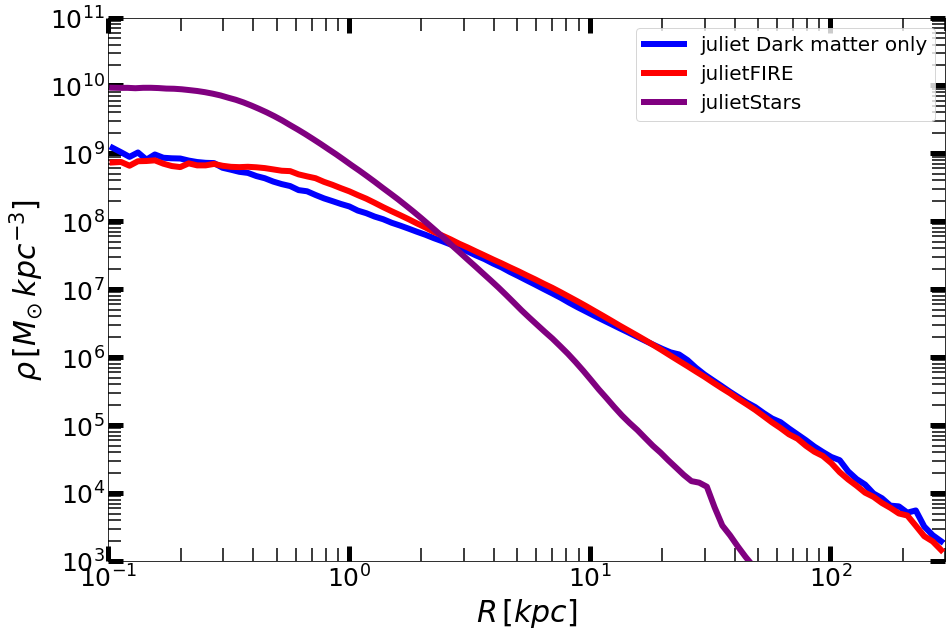

In [392]:
ax_font = 25
txt_font = 30
lw = 4

######################
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R\, [kpc]$', fontsize = 30)
plt.ylabel(r'$\rho\, [M_{\odot}\, kpc^{-3}]$', fontsize = 30)

plt.loglog(dark_radial_bins, Den_dark, linewidth= 6, color = 'Blue',label = str(halo)+' Dark matter only' )
plt.loglog(bary_radial_bins,  Den_bary  ,  linewidth= 6, color = 'Red', label = str(halo)+''+'FIRE' )
plt.loglog(star_radial_bins,  Den_star  ,  linewidth= 6, color = 'Purple', label = str(halo)+''+'Stars' )





np.save(path+"/"+'density_dark_un_norm'+str(halo)+'.npy',Den_dark)
np.save(path+"/"+'dark_bins_rho_un_norm'+str(halo)+'.npy',dark_radial_bins)
np.save(path+"/"+'density_bary_un_norm'+str(halo)+'.npy',Den_bary)
np.save(path+"/"+'bary_bins_rho_un_norm'+str(halo)+'.npy',bary_radial_bins)







plt.xlim(    0.1, 300)
plt.ylim(    10**3, 10**11)
plt.legend(fontsize = 20)
plt.savefig(path +'Dark_matter_density.png')
plt.show()

                         
#=====================  3.Plot the data  =====================

# Now Use Interpolation to determine the value at which normalization needs to be done to 

In [398]:
print(np.interp(10000, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))
print(np.interp(0, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))

local_rho_dark = (np.interp(8.3, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))
print (1.e7/local_rho_dark)

mult_dark = 1.e7/local_rho_dark


local_rho_bary = (np.interp(8.3, bary_radial_bins, Den_bary, left= np.max(Den_bary), right= np.min(Den_bary), period=None) )
print(1.e7/local_rho_bary)

mult_bary = 1.e7/local_rho_bary



vel_norm_dark = np.sqrt(mult_dark )

vel_norm_bary = np.sqrt(mult_bary )

vel_norm_stars = np.sqrt(mult_bary)


1957.373368605089
1206706467.6914222
1.6020753057749917
1.3135630772519313


In [399]:
pos_x_dark,pos_y_dark,pos_z_dark,radius_dark,dm_mass_dark_final,velocities_dark_final,dm_only_mass = make_coords(dark_coords,dm_mass_dark,velocities_dark,mult_dark)

pos_x_bary,pos_y_bary,pos_z_bary,radius_bary,dm_mass_bary_final,velocities_bary_final,dm_bary_mass = make_coords(bary_coords,dm_mass_bary,velocities_bary,mult_bary)


dm_mass_dark_final = np.asarray(dm_mass_dark_final)
dm_mass_bary_final = np.asarray(dm_mass_bary_final)

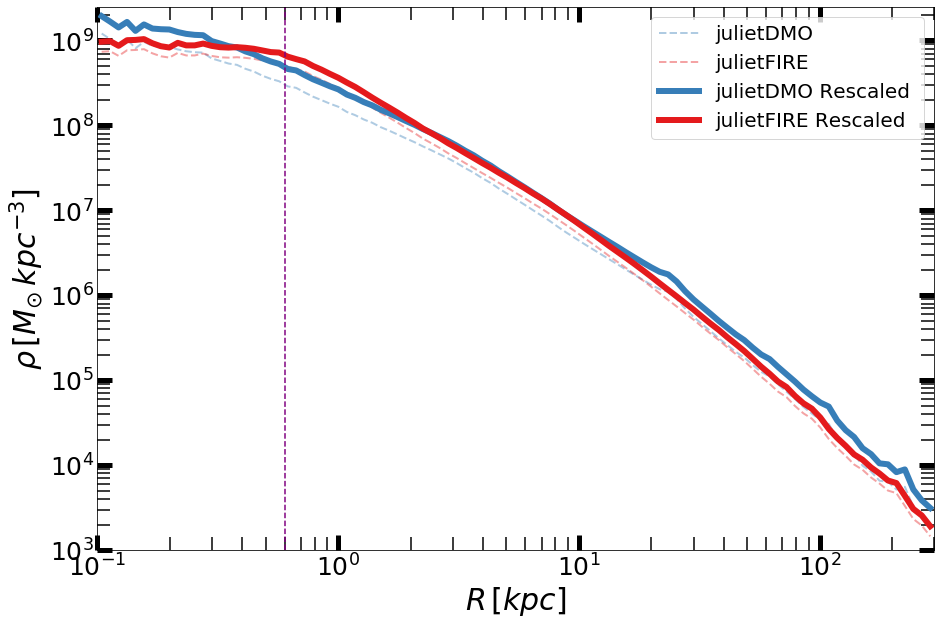

In [400]:
from operator import truediv
my_bins = 100


binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)


dark_radial_bins_new, Den_dark_new = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
bary_radial_bins_new, Den_bary_new = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300 )





CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']




ax_font = 25
txt_font = 30
lw = 4

######################
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R\, [kpc]$', fontsize = 30)
plt.ylabel(r'$\rho\, [M_{\odot}\, kpc^{-3}]$', fontsize = 30)
plt.loglog(dark_radial_bins, Den_dark, linewidth= 2,linestyle='--', alpha =0.4 ,color =  CB_color_cycle[0],label = str(halo)+'DMO ' )
plt.loglog(bary_radial_bins,  Den_bary  ,  linewidth= 2,linestyle='--', alpha = 0.4,color =  CB_color_cycle[7], label = str(halo)+''+'FIRE' )

plt.loglog(dark_radial_bins_new, Den_dark_new, linewidth= 6, color =  CB_color_cycle[0],label = str(halo)+'DMO Rescaled ' )
plt.loglog(bary_radial_bins_new,  Den_bary_new  ,  linewidth= 6, color =  CB_color_cycle[7], label = str(halo)+''+'FIRE Rescaled' )



np.save(path+"/"+'density_dark'+str(halo)+'.npy',Den_dark_new)
np.save(path+"/"+'dark_bins_rho'+str(halo)+'.npy',dark_radial_bins_new)
np.save(path+"/"+'density_bary'+str(halo)+'.npy',Den_bary_new)
np.save(path+"/"+'bary_bins_rho'+str(halo)+'.npy',bary_radial_bins_new)






#plt.loglog(rad,rho_test,color = 'orange', linestyle='--', linewidth=3, label = ' NFW')
plt.axvline(x= .6, color = 'purple',linestyle='--')
#plt.axvline(x= 8.3, color = 'orange',linestyle='--')

plt.xlim(    0.1, 300)
plt.ylim(    10**3, 10**9.4)
plt.legend(fontsize = 20)
plt.savefig(path +'Dark_matter_density'+str(halo)+'.png',   bbox_inches='tight' )
plt.show()

                         
#=====================  3.Plot the data  =====================

In [401]:


v_av_dark,radial_bins_dark,dispersion_dark_basic, vx_dark, vy_dark,vz_dark = make_velocities(velocities_dark_final,radius_dark,binning_dark,vel_norm_dark)

v_av_bary,radial_bins_bary,dispersion_bary_basic, vx_bary, vy_bary,vz_bary = make_velocities(velocities_bary_final,radius_bary,binning_bary,vel_norm_bary)

v_av_stars,radial_bins_stars, dispersion_star_basic, vx_stars, vy_stars,vz_stars = make_velocities(velocities_stars,radius_stars,binning_stars,vel_norm_stars)



In [402]:
print(len(velocities_dark_final))
print(len(velocities_bary_final))


48829472
48965340


In [403]:
print(len(dm_mass_dark_final))
print(len(dm_mass_bary_final))

print(dm_only_mass)
print(dm_bary_mass)

#binning_dark = np.arange(0,300,0.5)
#binning_bary = np.arange(0, 300,0.5)
# Old binning above


v_av_dark_un_norm,radial_bins_dark_un_norm,dispersion_dark_basic_un_norm,vx_dark_un_norm, vy_dark_un_norm,vz_dark_un_norm = make_velocities(velocities_dark_final,radius_dark,binning_dark,1.0)

v_av_bary_un_norm,radial_bins_bary_un_norm,dispersion_bary_basic_un_norm , vx_bary_un_norm, vy_bary_un_norm, vz_bary_un_norm = make_velocities(velocities_bary_final,radius_bary,binning_bary,1.0)

48829472
48965340
36451.31685148373
25259.273167914565


402.87789948032423


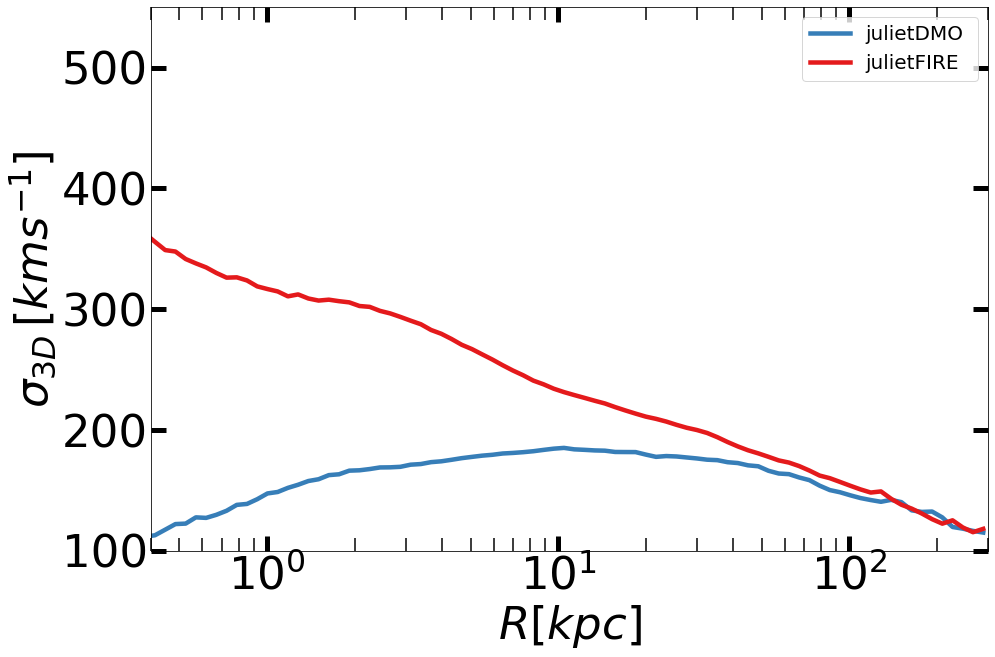

In [404]:

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']



ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R [kpc]$',  fontsize = ax_font)
plt.ylabel(r'$\sigma_{3D}\, [ km s^{-1}]$',  fontsize = ax_font)


plt.semilogx(radial_bins_dark_un_norm, dispersion_dark_basic_un_norm, linewidth= 4.5, color = CB_color_cycle[0],label = str(halo)+ 'DMO ')

plt.semilogx(radial_bins_bary_un_norm, dispersion_bary_basic_un_norm, linewidth= 4.5, color = CB_color_cycle[7],label = str(halo)+ 'FIRE' )


ax.legend(loc=0, fontsize = 20)

plt.xlim(    0.4, 300.)
plt.ylim(    100, 550.0)



np.save(path+"/"+'disp_dark_un_norm'+str(halo)+'.npy',dispersion_dark_basic_un_norm)
np.save(path+"/"+'dark_bins_vel_disp_un_norm'+str(halo)+'.npy',radial_bins_dark_un_norm)

np.save(path+"/"+'disp_bary_un_norm'+str(halo)+'.npy',dispersion_bary_basic_un_norm)
np.save(path+"/"+'bary_bins_vel_disp_un_norm'+str(halo)+'.npy',radial_bins_bary_un_norm)







plt.savefig(path +'Velocity_dispersion_un_norm'+str(halo)+'.png', bbox_inches='tight')
#plt.title( r'$\sigma $' + ' ' + str(halo)+ ' '+ 'DMO vs.FIRE', fontsize = 40)                                                                                                                                                                 
#plt.xlabel(r'$Radius\, [kpc]$', fontsize = 30)

#plt.ylabel(r'$\sigma_{disp}\, [ km s^{-1}]$')

print(np.max(dispersion_bary_basic_un_norm ))


# Here we use the dispersions that will be used to find the velocity dispersions estimate for nans later on 

461.7415009383701


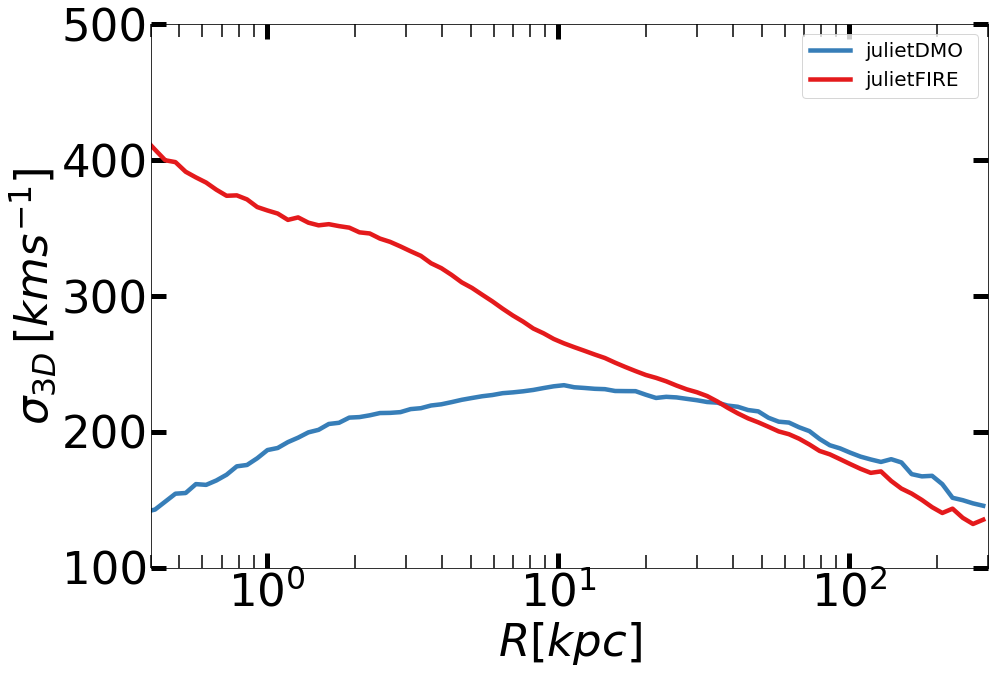

In [405]:

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']



ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R [kpc]$',  fontsize = ax_font)
plt.ylabel(r'$\sigma_{3D}\, [ km s^{-1}]$',  fontsize = ax_font)


plt.semilogx(radial_bins_dark, dispersion_dark_basic, linewidth= 4.5, color = CB_color_cycle[0],label = str(halo)+ 'DMO ')

plt.semilogx(radial_bins_bary, dispersion_bary_basic, linewidth= 4.5, color = CB_color_cycle[7],label = str(halo)+ 'FIRE' )


ax.legend(loc=0, fontsize = 20)

plt.xlim(    0.4, 300)
plt.ylim(    100., 500.)


np.save(path+"/"+'disp_dark'+str(halo)+'.npy',dispersion_dark_basic)
np.save(path+"/"+'dark_bins_vel_disp'+str(halo)+'.npy',radial_bins_dark)

np.save(path+"/"+'disp_bary'+str(halo)+'.npy',dispersion_bary_basic)
np.save(path+"/"+'bary_bins_vel_disp'+str(halo)+'.npy',radial_bins_bary)




plt.savefig(path +'Velocity_dispersion'+str(halo)+'.png', bbox_inches='tight')
#plt.title( r'$\sigma $' + ' ' + str(halo)+ ' '+ 'DMO vs.FIRE', fontsize = 40)                                                                                                                                                                 
#plt.xlabel(r'$Radius\, [kpc]$', fontsize = 30)

#plt.ylabel(r'$\sigma_{disp}\, [ km s^{-1}]$')

print(np.max(dispersion_bary_basic ))


#  Find the velocity Dispersion weighting the old fashioned way 

# 13   (p wave)

In [406]:
def local_velocity_disp_weighting_p(file_name, radius, bin_edges, dispersion_sq):
    vel_disp_local_p = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_sq)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_p = (np.interp(radius[i] , bin_edges, dispersion_sq, left= dispersion_sq[0] , right= dispersion_sq[final_value], period=None))
        #print(local_vel_p)
        local_vel_p = ((local_vel_p) /( 2.99792458e5)**2 )        
        #print(local_vel_p)
        vel_disp_local_p.insert( i, local_vel_p )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_p)
    return vel_disp_local_p
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

# 14   (d wave)

In [407]:
def local_velocity_disp_weighting_d(file_name, radius, bin_edges, dispersion_fourth):
    vel_disp_local_d = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_fourth)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_d = (np.interp(radius[i] , bin_edges, dispersion_fourth, left= dispersion_fourth[0] , right= dispersion_fourth[final_value], period=None))
        #print(local_vel_p)
        local_vel_d = ((local_vel_d) /( 2.99792458e5)**4 )        
        #print(local_vel_p)
        vel_disp_local_d.insert( i, local_vel_d )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_d)
    return vel_disp_local_d
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

#    Now Finding the local density and Local Velocity Dispersion

# This is needed for advanced local weighting !!!!!

# Start with local weighting for stars

# Use old method

In [410]:
def local_density_weighting(file_name, radius, bin_edges,Den):

    rho_local = []
    #file_name = "rho_local_dm_m12i_new.npy"

    for i in range(len(radius)):

        local_d = (np.interp(radius[i] , bin_edges, Den, left= np.max(Den), right = np.min(Den), period=None))
        rho_local.insert( i, local_d )

    np.save(path+"/"+file_name+'.npy',rho_local)
    return rho_local
    

In [411]:
star_file_name = '/rho_star_only_s_wave_'+str(halo)

rho_local_stars = local_density_weighting(star_file_name, radius_stars, star_radial_bins,Den_star)



In [416]:
rho_local_times_mass_stars = star_mass_final * rho_local_stars

In [417]:
rho_local_times_mass_stars  =  np.asarray(rho_local_times_mass_stars )
print(len(rho_local_times_mass_dm_only))






15590976


In [418]:
plot_bins = 180



rho_local_times_mass_stars  = ( rho_local_times_mass_dm_only * conversion ) 

In [419]:
Phi_stars,Theta_stars,radius_stars,  Angle_weighting_stars ,Cos_Psi_dark_stars = coord_trans( pos_x_stars ,pos_y_stars ,pos_z_stars,d, rho_local_times_mass_stars )


Angle_weighting_stars_conv = Angle_weighting_stars / ( 4.0 * np.pi/  ( plot_bins * plot_bins)) 


# Careful! Don't do the conversion twice !!!!!!!



Theta_deg_stars, Phi_deg_stars  =  Angle_convert( Theta_stars,Phi_stars)

len binner
180
3.37331011060067e+21
1.6067153555764218e+19
4.5664577952274534e+17
11.853484752227812
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
0
45
90
135
180
225
270
315
0
printing max value of DJ/DO
26.01076191122189
printing x and y bins


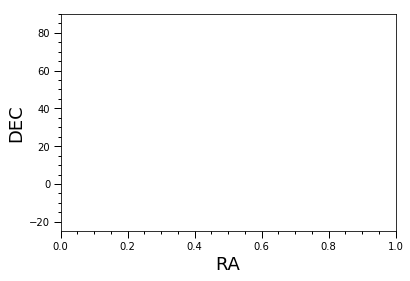

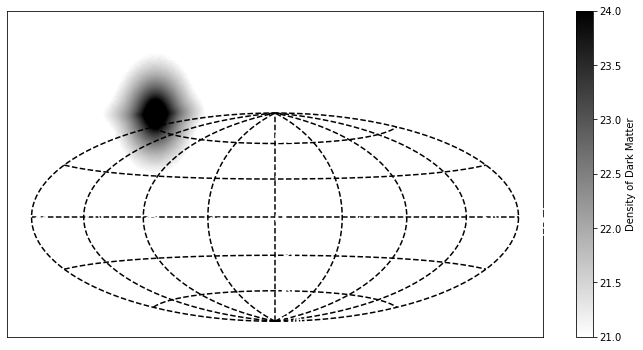

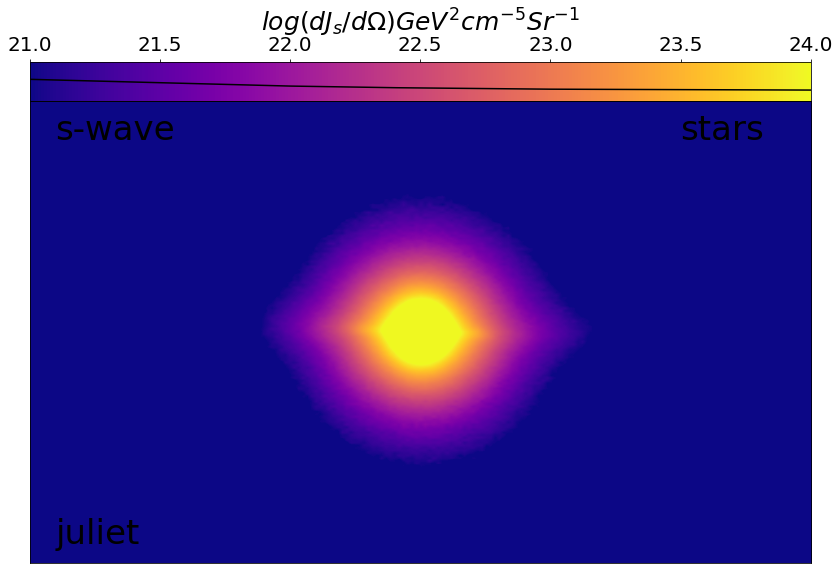

In [427]:

# tested  for 0,180
plot_bins = 180

#r'$R\, [kpc]$'


title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    


run_type = 'stars'

wave_type = 's-wave'


lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'stars'


x_bin,y_bin = hammer_projection(Phi_deg_stars, Theta_deg_stars ,Angle_weighting_stars_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.plasma,title,x_lim,y_lim,run_type, wave_type  )


# Old Style

In [428]:
def hammer_projection(Phi_deg_array, Theta_deg_array , Final_weighting, plot_bins,lower_limit,upper_limit,file_name,color_map,title,x_lim,y_lim,run_type,wave_type):
      
    
    lz = 180
    #sampling of aitoff projection
    #RA,l, or Lambda Sgr
    binner1 = np.linspace(-180.,180.,plot_bins)
    #DEC, b, or B Sgr
    binner2 = np.linspace(-90.,90.,plot_bins)
    fig, ax = plt.subplots()#create figure in inches


    ### Moment AT.Project is used
    l, b = at.project(Phi_deg_array,Theta_deg_array,lz)

    #Create density map
    #img, xbins,ybins = np.histogram2d(ra,dec, weights = Angle_weighting_NFW, bins=(binner1,binner2) )
    img, xbins,ybins = np.histogram2d(l,b, weights = Final_weighting, bins=(binner1,binner2) )

    img = np.log10(img)

    print(len(img))

    dark_only_vmax = np.max(img)
    dark_only_vmin = np.percentile(img, 25)

    print(np.max(img))
    print(np.median(img))
    print(np.percentile(img, 25))
    print(np.min(img))

    #Import a module to make minor ticks
    from matplotlib.ticker import AutoMinorLocator
    #Set up to tell matplotlib to autoselect minor tick locations
    minorLocator   = AutoMinorLocator()

    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)


    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)
    ax.set_ylim([-25.,90.])
    ax.set_ylabel('DEC',fontsize=18)
    ax.set_xlabel('RA',fontsize=18)

    #fig.gca().invert_xaxis()


    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(12.,6.))#create figure in inches
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap=plt.cm.binary,interpolation='bicubic',aspect='auto' #try a different interpolation method for the image
                     ,vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot)
    cbar.set_label('Density of Dark Matter')
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on

    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    fig.gca().get_xaxis().set_visible(False)
    fig.gca().get_yaxis().set_visible(False)
    fig.gca().invert_xaxis()


    import matplotlib as mat

    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(14.,10.))#create figure in inches
    #create a colorbar axis
    cax, kw = mat.colorbar.make_axes(ax,pad=0,shrink=1.0,location='top',fontsize = 14)


    #imshow will also do RGB if you feed it a 3d or 4d array ( the last dimension being opcacity)
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap= color_map,#try a different color scheme for the image
                     interpolation='bilinear',aspect='auto', 
                     vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot,cax=cax,orientation='horizontal')
    
    cbar.set_label(title, fontsize = 25 , y = 1.28 )
    
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=20) 
    
    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )
    mpl.pyplot.text( x_lim[0],y_lim[0],  wave_type , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[1],y_lim[1], str(halo) , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[2],y_lim[2],  run_type , fontsize = 34, color = 'black' )
   
        
    #cbar.ax.set_xticklabels()
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=8)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #because it drops all axes for whatever reason
    cax.get_xaxis().set_visible(True)
    ax.set_xlim([180.,-180.])
    ax.set_ylim([-90.,90.])
    
    plt.savefig(path + '/' +file_name_of_hammer+wave_type+str(halo)+'.png')
    
    
    
    print ('printing max value of DJ/DO')
    print (np.max(img))
    print ('printing x and y bins')
    return xbins,ybins



/Users/danmckeown/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


179
26.57941814058309
19.258922454228586
18.45229963763521
-inf
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
0
45
90
135
180
225
270
315
0
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
0
45
90
135
180
225
270
315
0
printing max value of DJ/DO
26.57941814058309
printing x and y bins


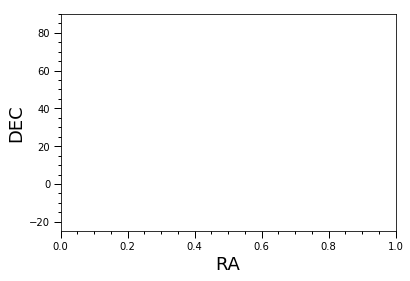

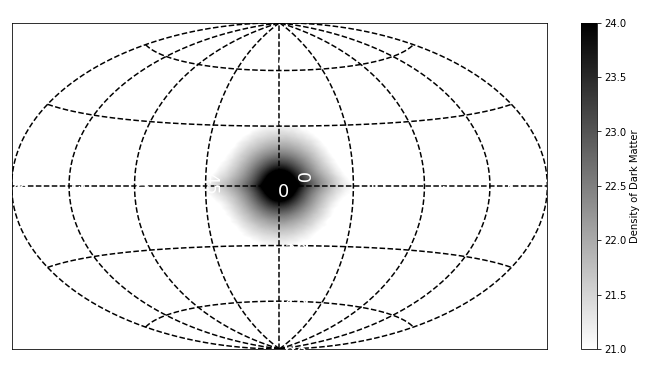

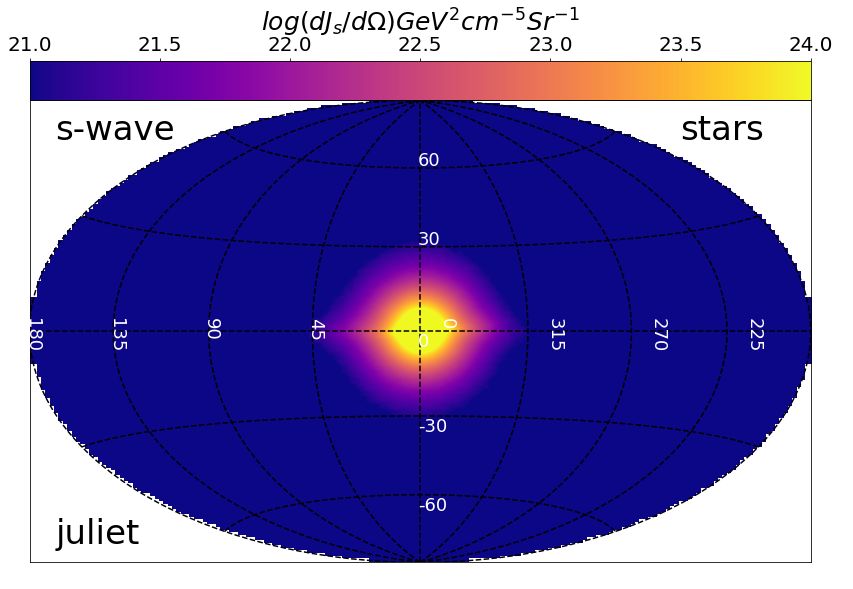

In [429]:

# tested  for 0,180
plot_bins = 180

#r'$R\, [kpc]$'


title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    


run_type = 'stars'

wave_type = 's-wave'


lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'stars'


x_bin,y_bin = hammer_projection(Phi_deg_stars, Theta_deg_stars ,Angle_weighting_stars_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.plasma,title,x_lim,y_lim,run_type, wave_type  )


In [409]:

#J_factor_dark_sum_s
smoothing_length_stars, v_disp_stars,v_mag_stars = get_particle_hsml( pos_x_stars,  pos_y_stars,  pos_z_stars, vx_stars, vy_stars, vz_stars )



volumes_star = (4./3.) * np.pi * (smoothing_length_stars)**3


masses_stars = 32. * star_mass_final


rho_stars = masses_stars/volumes_star



np.save(path+"/"+'full_density_s_stars_'+str(halo)+'.npy',rho_stars)
 
    
np.save(path+"/"+'full_disp_s_stars_'+str(halo)+'.npy',v_disp_stars)


NameError: name 'mass_stars_final' is not defined

In [ ]:
smoothing_length_dark, v_disp_dark, v_mag_dark = get_particle_hsml( pos_x_dark,  pos_y_dark,  pos_z_dark, vx_dark, vy_dark, vz_dark )



volumes_d = (4./3.) * np.pi * (smoothing_length_dark)**3


masses_d = 32. * dm_mass_dark_final


rho = masses_d/volumes_d



np.save(path+"/"+'full_density_s_dark_'+str(halo)+'.npy',rho)
 
    
np.save(path+"/"+'full_disp_s_dark_'+str(halo)+'.npy',v_disp_dark)




In [ ]:


np.save(path+"/"+'full_mag_s_dark_'+str(halo)+'.npy',v_mag_dark)
print(np.min(v_disp_dark))

print(np.sum(v_mag_dark))

In [ ]:



print(np.average((v_disp_dark)))

print(np.average(v_mag_dark))

print(np.max(v_disp_dark))

print(np.max(v_mag_dark))

print(v_mag_dark[5])
print(v_disp_dark[5])
print(np.max(v_mag_dark))
print(np.max(v_disp_dark))

In [ ]:
###############################################

#J_factor_dark_sum_s
smoothing_length_bary, v_disp_bary,v_mag_bary = get_particle_hsml( pos_x_bary,  pos_y_bary,  pos_z_bary, vx_bary, vy_bary, vz_bary )



volumes_b = (4./3.) * np.pi * (smoothing_length_bary)**3


masses_b = 32. * dm_mass_bary_final


rho_b = masses_b/volumes_b



np.save(path+"/"+'full_density_s_bary_'+str(halo)+'.npy',rho_b)
 
    
np.save(path+"/"+'full_disp_s_bary_'+str(halo)+'.npy',v_disp_bary)



In [ ]:


np.save(path+"/"+'full_mag_s_bary_'+str(halo)+'.npy',v_mag_bary)

In [ ]:


print(np.average((v_disp_bary)))

print(np.average(v_mag_bary))

# Load Files 

In [23]:
v_disp_dark =  np.load(path+"/"+'full_disp_s_dark_'+str(halo)+'.npy')
v_mag_dark = np.load(path+"/"+'full_mag_s_dark_'+str(halo)+'.npy')
rho = np.load(path+"/"+'full_density_s_dark_'+str(halo)+'.npy')

v_disp_bary =  np.load(path+"/"+'full_disp_s_bary_'+str(halo)+'.npy')
v_mag_bary = np.load(path+"/"+'full_mag_s_bary_'+str(halo)+'.npy')

rho_b = np.load(path+"/"+'full_density_s_bary_'+str(halo)+'.npy')


In [24]:
#list1 = [10, -21, 4, -45, 66, -93, 1]
  
pos_count, neg_count = 0, 0
  
# iterating each number in list
for num in v_mag_dark:
      
    # checking condition
    if num >= 0:
        pos_count += 1
  
    else:
        neg_count += 1
          
print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  48829472
Negative numbers in the list:  0


In [25]:
print(np.average( v_mag_bary))
print(np.average(v_disp_bary))

183.10632
145.04971


In [26]:
print(len(rho))
print(rho[0])
rho_squared_new = (rho)**2

print(rho_squared_new[0])

print(rho[0]**2)

48829472
1958689.7985333125
3836465726878.4683
3836465726878.4683


# Make a map of the density along the line of sight

In [27]:

Phi_dark_s_new,Theta_dark_s_new,radius_dark_s_new,rho_squared_new ,Cos_Psi_dark_s =  coord_trans_new(pos_x_dark ,pos_y_dark ,pos_z_dark,d,rho_squared_new)
                                                                                                    






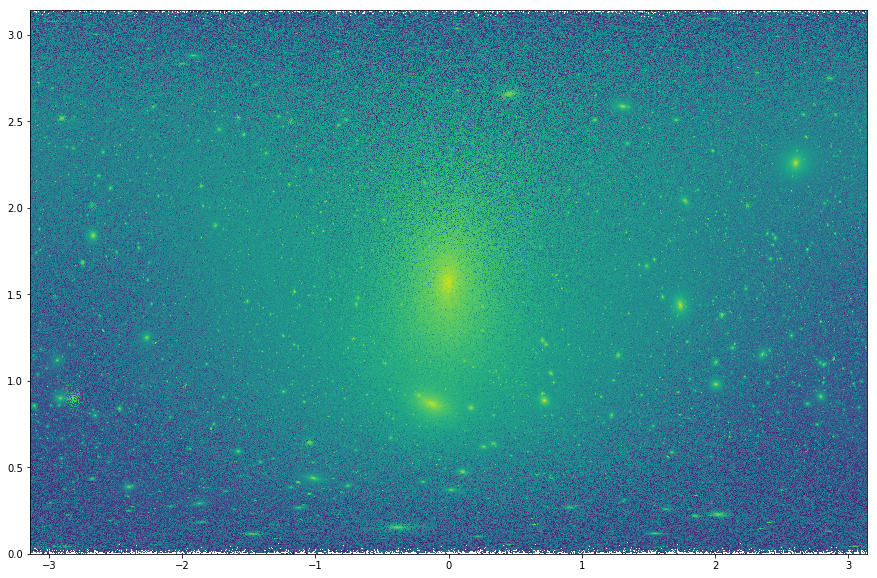

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

plt.hist2d( Phi_dark_s_new,Theta_dark_s_new, norm=mpl.colors.LogNorm(),  weights = (rho_squared_new),   bins= 3000)


plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9.98282761e-01, -9.91624595e-01, -9.84966428e-01, -9.78308261e-01,
        -9.71650094e-01, -9.64991928e-01, -9.58333761e-01, -9.51675594e-01,
        -9.45017427e-01, -9.38359260e-01, -9.31701094e-01, -9.25042927e-01,
        -9.18384760e-01, -9.11726593e-01, -9.05068427e-01, -8.98410260e-01,
        -8.91752093e-01, -8.85093926e-01, -8.78435760e-01, -8.71777593e-01,
        -8.65119426e-01, -8.58461259e-01, -8.51803093e-01, -8.45144926e-01,
        -8.38486759e-01, -8.31828592e-01, -8.25170425e-01, -8.18512259e-01,
        -8.11854092e-01, -8.05195925e-01, -7.98537758e-01, -7.91879592e-01,
        -7.85221425e-01, -7.78563258e-01, -7.71905091e-01, -7.65246925e-01,
        -7.58588758e-01, -7.51930591e-01, -7.45272424e-01, -7.38614

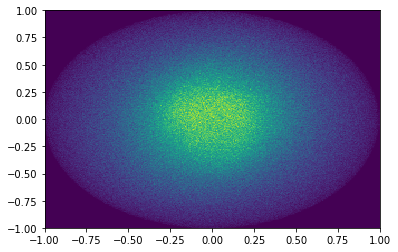

In [423]:
plt.hist2d(star_coords[:,0],star_coords[:,1] ,bins= 300)

In [422]:
rad = 1
x = star_coords[:,0]
y = star_coords[:,1]
z = star_coords[:,2]  
            
radius = np.sqrt(x*x + y*y  + z*z  )

mask = radius <= rad
star_coords = star_coords[mask]


In [29]:
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

SyntaxError: invalid syntax (<ipython-input-29-bd1f04f45f83>, line 1)

In [ ]:
import scipy.optimize as opt
import numpy as np
import pylab as plt


In [ ]:
q = (x, y)   

In [ ]:
def twoD_Gaussian(q, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)   
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)    
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)         
                        + c*((y-yo)**2)))                                   
    return g.ravel()

In [ ]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

In [ ]:
#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

In [ ]:
# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.8*np.random.normal(size=data.shape)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)


In [30]:
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 5, colors='black')
plt.show()


NameError: name 'twoD_Gaussian' is not defined

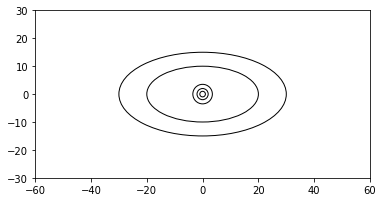

In [293]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


angle_step = 45  # degrees
angles = np.arange(0, 180, angle_step)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})



ellipse = Ellipse((0, 0), 2, 2,fill=False)
ellipse1 = Ellipse((0, 0), 4, 4,fill=False)
ellipse2 = Ellipse((0, 0), 7, 7,fill=False)
ellipse3 = Ellipse((0, 0), 40, 20,fill=False)
ellipse4 = Ellipse((0, 0), 60, 30,fill=False, color = 'black')
ellipse5 = Ellipse((0, 0), 70, 40,fill=False, color = 'black')




ax.add_artist(ellipse)
ax.add_artist(ellipse1)
ax.add_artist(ellipse2)
ax.add_artist(ellipse3)
ax.add_artist(ellipse4)






ax.set_xlim(-60., 60.)
ax.set_ylim(-30., 30.)

plt.show()


# Find the Nans

In [246]:
print(np.sum(v_disp_dark))
print(np.min(v_mag_dark))
print(len((np.argwhere(np.isnan(v_disp_dark)))))
print(len((np.argwhere(np.isnan(v_mag_dark)))))
ratio = (v_disp_dark/v_mag_dark)
print(np.min(ratio))


6221024000.0
1.2752694
0
0
0.17965822



# Dark only nans is an array of indices that are nans. Use this array of indices to act on the density array before multiplying to get the Local J factor. 

In [32]:
dark_only_nans = (np.argwhere(np.isnan(v_disp_dark)))
dark_only_nans = dark_only_nans.flatten()
print(dark_only_nans)

print(len(dark_only_nans))

leftover_radii_D = radius_dark[dark_only_nans]
np.save(path+"/"+'dark_nans_juliet'+'.npy',dark_only_nans)

np.save(path+"/"+'left_over_radii_d_'+str(halo)+'.npy',leftover_radii_D)

print(leftover_radii_D)
print(len(leftover_radii_D))

leftover_rho_dark = rho[dark_only_nans]

np.save(path+"/"+'left_density_d_'+str(halo)+'.npy',leftover_rho_dark)

# Now later on we will use Leftover radii_D to complete the weighting manually ( with interpolation directly)

[]
0
[]
0


# Now load the vel. disp data and local rho so it doesn't have to be run again!


In [33]:
print(len(v_disp_dark))
print(len(v_disp_bary))
#print(len(local_rho_dark))
#print(len(local_rho_bary))


48829472
48965340


In [34]:



bary_only_nans = (np.argwhere(np.isnan(v_disp_bary)))
bary_only_nans = bary_only_nans.flatten()

np.save(path+"/"+'bary_nans_juliet'+'.npy',bary_only_nans)
print(dark_only_nans)

print(len(bary_only_nans))

leftover_radii_B = radius_bary[bary_only_nans]

np.save(path+"/"+'left_over_radii_b_'+str(halo)+'.npy',leftover_radii_B)


leftover_rho_bary = rho_b[bary_only_nans]

np.save(path+"/"+'left_density_b_'+str(halo)+'.npy',leftover_rho_bary)

# Now late


print(leftover_radii_B)
print(len(leftover_radii_B))

# Now later on we will use Leftover radii_D to complete the weighting manually ( with interpolation directly)


[]
0
[]
0


In [35]:
print(len(leftover_rho_bary))
print(len(leftover_rho_dark))

0
0


# Remove Nans from the arrays 

In [36]:
v_disp_dark_F = v_disp_dark[np.logical_not(np.isnan(v_disp_dark))]

In [37]:
v_mag_dark_F = v_mag_dark[np.logical_not(np.isnan(v_disp_dark))]

In [38]:
print (len(v_disp_dark))

print(np.argwhere(np.isnan(v_disp_dark)))

48829472
[]


In [39]:
# Get rid of this for the moment

In [40]:
v_disp_bary_F = v_disp_bary[np.logical_not(np.isnan(v_disp_bary))]

#  J factor values calculated

In [41]:
dispersion_dark_sq = 2.0 * v_disp_dark_F * v_disp_dark_F 

dispersion_bary_sq = 2.0  * v_disp_bary_F * v_disp_bary_F




dispersion_dark_fourth = (48./9.) * (v_disp_dark_F )**4

dispersion_bary_fourth = (  48./9. ) *  (v_disp_bary_F)**4




dispersion_dark_sq_F =  dispersion_dark_sq /(( 2.99792458e5)**2 ) 

dispersion_bary_sq_F = dispersion_bary_sq /(( 2.99792458e5)**2 )



dispersion_dark_fourth_F = dispersion_dark_fourth / (( 2.99792458e5)**4 )

dispersion_bary_fourth_F = dispersion_bary_fourth / (( 2.99792458e5)**4 )


v_mag_dark_converted =  (v_mag_dark)**2 / (( 2.99792458e5)**2 ) 

#### 4p/n^2 weighting is only for the sky map, because the bins in the dJ/dOmega plot are the "rings" of width 2pi*dcos(theta)
#### we are doing rings in the dJ/dO plot, but in the sky map we're doing n^2 squares over 4pi steradians

In [42]:
plot_bins = 100


rho_local_times_mass_dm_only = dm_mass_dark_final * rho

rho_local_times_mass_dm_only_F  = ( rho_local_times_mass_dm_only * conversion ) 



Phi_dark_s,Theta_dark_s,radius_dark_s,  Angle_weighting_dark_new_s ,Cos_Psi_dark_s = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, rho_local_times_mass_dm_only_F )


Angle_weighting_dark_new_s_conv = Angle_weighting_dark_new_s / ( 4.0 * np.pi/  ( plot_bins * plot_bins)) 


# Careful! Don't do the conversion twice !!!!!!!



Theta_deg_dark_array_s, Phi_deg_dark_array_s  =  Angle_convert( Theta_dark_s,Phi_dark_s)





len binner
100
3.3639747665248953e+21
939310701081883.9
46157672577720.7
19.774775562462946
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
0
45
90
135
180
225
270
315
0
printing max value of DJ/DO
24.16069463760758
printing x and y bins
[[19.77477556 20.43111437 20.34723817 ... 20.35999944 20.48600051
  20.63313018]
 [19.95692104 20.13153158 20.31929336 ... 20.60991613 20.73407751
  20.57288733]
 [20.69429212 20.15889265 20.3683057  ... 20.81367077 20.73622154
  20.8160563 ]
 ...
 [20.13443963 20.24840893 20.1853547  ... 21.07955711 20.93763945
  20.70367294]
 [20.11678336 20.7036364  20.01426009 ... 20.78263381 20.73960148
  20.59048033]
 [20.24969775 21.14119994 20.9320959  ... 20.73124535 20.72606964
  20.7002661 ]]


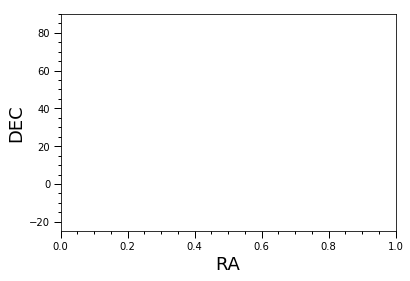

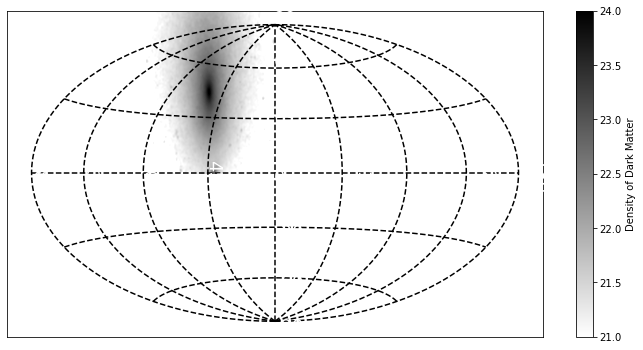

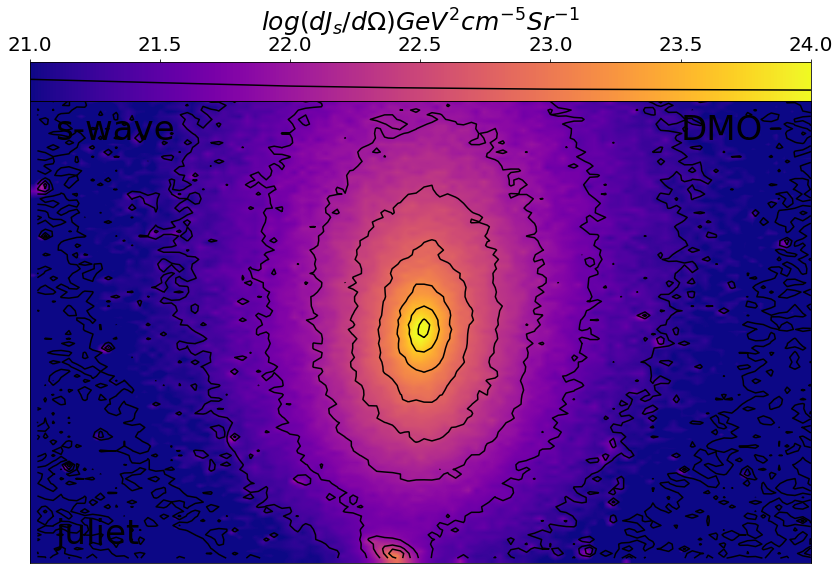

In [355]:
# tested  for 0,180
plot_bins = 100

#r'$R\, [kpc]$'

lower_limit,upper_limit = 21., 24.


title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    
x_lim = [21.1,21.1 , 23.5]

y_lim = [18, -13, 18]

run_type = 'DMO'

wave_type = 's-wave'


lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'Hammer_dm_only_new_fits'


x_bin,y_bin,J_facts,l_s,b_s, Angle_weighting_dark_new_s_conv = hammer_projection(Phi_deg_dark_array_s, Theta_deg_dark_array_s ,Angle_weighting_dark_new_s_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.plasma,title,x_lim, y_lim, run_type,wave_type)



print(J_facts)

In [93]:
print(x_bin)
x_bin_new = x_bin[:-1]
y_bin_new = y_bin[:-1]

[-90.         -88.18181818 -86.36363636 -84.54545455 -82.72727273
 -80.90909091 -79.09090909 -77.27272727 -75.45454545 -73.63636364
 -71.81818182 -70.         -68.18181818 -66.36363636 -64.54545455
 -62.72727273 -60.90909091 -59.09090909 -57.27272727 -55.45454545
 -53.63636364 -51.81818182 -50.         -48.18181818 -46.36363636
 -44.54545455 -42.72727273 -40.90909091 -39.09090909 -37.27272727
 -35.45454545 -33.63636364 -31.81818182 -30.         -28.18181818
 -26.36363636 -24.54545455 -22.72727273 -20.90909091 -19.09090909
 -17.27272727 -15.45454545 -13.63636364 -11.81818182 -10.
  -8.18181818  -6.36363636  -4.54545455  -2.72727273  -0.90909091
   0.90909091   2.72727273   4.54545455   6.36363636   8.18181818
  10.          11.81818182  13.63636364  15.45454545  17.27272727
  19.09090909  20.90909091  22.72727273  24.54545455  26.36363636
  28.18181818  30.          31.81818182  33.63636364  35.45454545
  37.27272727  39.09090909  40.90909091  42.72727273  44.54545455
  46.36363636  48.

In [45]:
#print(((J_facts[0])))
#print((len(x_bin_new)))

np.save(path+"/"+'xbin'+str(halo)+'.npy',x_bin_new)
np.save(path+"/"+'ybin'+str(halo)+'.npy',y_bin_new)
np.save(path+"/"+'Jfacts'+str(halo)+'.npy',J_facts)


#np.save(path+"/"+'xbin'+str(halo)+'.npy',x_bin)
#np.save(path+"/"+'ybin'+str(halo)+'.npy',y_bin)
#np.save(path+"/"+'Jfacts'+str(halo)+'.npy',J_facts)



In [152]:
q = (Theta_deg_dark_array_s, Phi_deg_dark_array_s)

data = twoD_Gaussian(q, 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

NameError: name 'twoD_Gaussian' is not defined

# Resolution Limit 

In [ ]:
print ( np.degrees (np.arctan( 0.4/8.3)) )

# Baryonic Analysis

## Baryonic Weighting

In [50]:
plot_bins = 180


rho_local_times_mass_dm_bary = dm_mass_bary_final * rho_b

rho_local_times_mass_dm_bary_F  = ( rho_local_times_mass_dm_bary * conversion ) 

        
 

Phi_bary_s_f, Theta_bary_s_f,radius_bary,  Angle_weighting_bary_new_s_f ,Cos_Psi_bary_s_f = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary ,d, rho_local_times_mass_dm_bary_F )


Angle_weighting_bary_new_s_conv_f = Angle_weighting_bary_new_s_f / ( 4.0 * np.pi/  ( plot_bins * plot_bins)) 


# Careful! Don't do the conversion twice !!!!!!!



Theta_deg_bary_array_s_f, Phi_deg_bary_array_s_f  =  Angle_convert( Theta_bary_s_f,Phi_bary_s_f)

In [51]:
print(np.sum(Theta_bary_s_f), np.sum(Phi_bary_s_f))

77588695.04752202 4755170.121121368


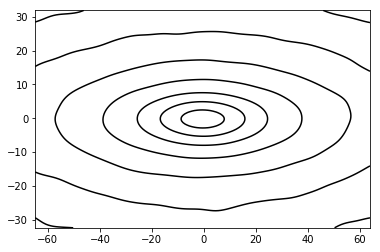

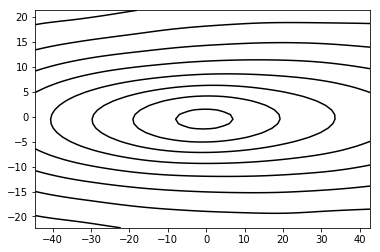

In [109]:

X_lim_b  =  np.load(path+"/"+'x_lim_b'+str(halo)+'.npy')
Y_lim_b  =  np.load(path+"/"+'y_lim_b'+str(halo)+'.npy')
New_band_b = np.load(path+"/"+'band_image_smoothed_lim_b'+str(halo)+'.npy')


plt.contour (X_lim_b,Y_lim_b,New_band_b ,colors='k');



plt.show()

X_lim  =  np.load(path+"/"+'x_lim'+str(halo)+'.npy')
Y_lim  =  np.load(path+"/"+'y_lim'+str(halo)+'.npy')
New_band = np.load(path+"/"+'band_image_smoothed_lim'+str(halo)+'.npy')


plt.contour (X_lim,Y_lim,New_band ,colors='k');

len binner
180
1.7689256046104377e+22
2454680189132514.0
100103547339498.12
19.8494233313474
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]
0
45
90
135
180
225
270
315
0
printing max value of DJ/DO
24.141672586644088
printing x and y bins


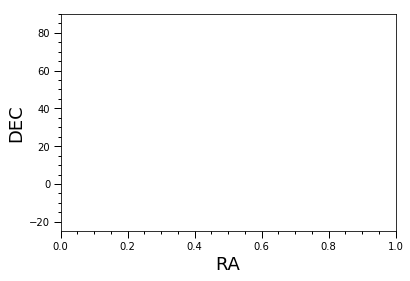

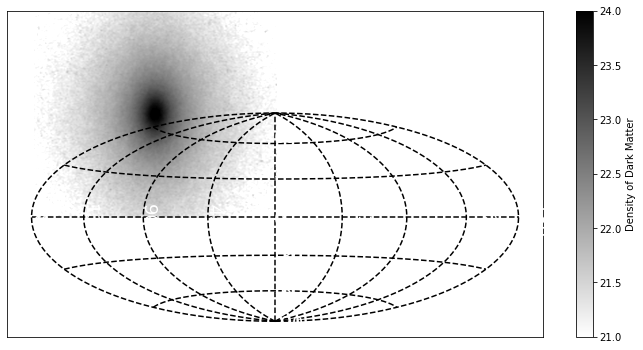

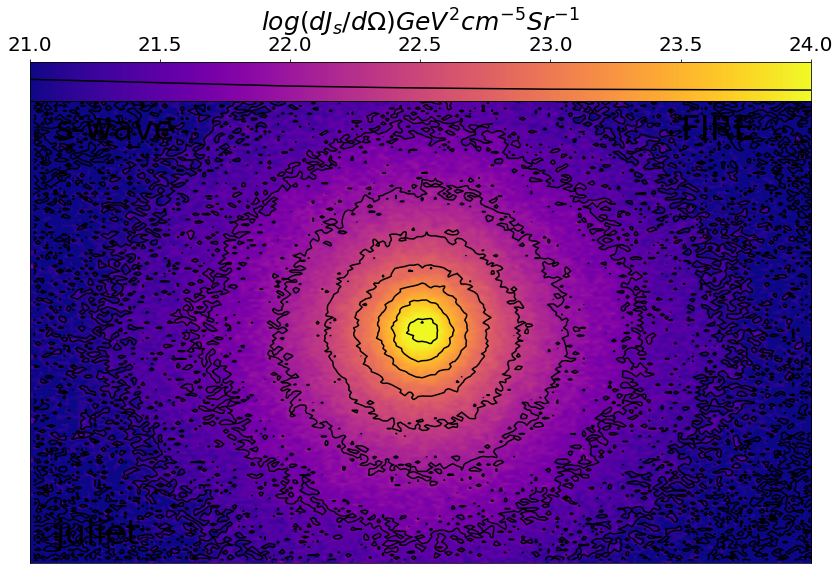

In [359]:
# tested  for 0,180
plot_bins = 180




title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    
x_lim = [21.1,21.1 , 23.5]

y_lim = [18, -13, 18]

run_type = 'FIRE'

wave_type = 's-wave'



lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'Hammer_bary_only_full_f_new'




x_bin_b , y_bin_b, J_facts_b, l_s_b, b_s_b, Angle_weighting_bary_new_s_conv_f = hammer_projection(Phi_deg_bary_array_s_f, Theta_deg_bary_array_s_f ,Angle_weighting_bary_new_s_conv_f , plot_bins,lower_limit ,upper_limit ,file_name_of_hammer,plt.cm.plasma,title,x_lim, y_lim,run_type, wave_type)


#print(x_bin,y_bin)

#### x_bin_b , y_bin_b, J_facts_b

In [288]:
import scipy as sp
import scipy.ndimage
upsample = 2
xx = sp.ndimage.zoom(x_con, upsample)
yy = sp.ndimage.zoom(y_con, upsample)

hist = sp.ndimage.zoom(J_facts_b, upsample)
smooth = 1
smooth *= upsample
#hist = sp.ndimage.gaussian_filter(hist, smooth)
hist = sp.ndimage.gaussian_filter(hist, smooth)



180 180 179
[1.32769891 1.32789839 1.32807444 1.32823628 1.32839366 1.32855512
 1.32872679 1.32891156 1.32910919 1.32931686 1.32953008 1.32974356
 1.32995204 1.33015076 1.33033581 1.33050454 1.33065569 1.3307896
 1.33090805 1.33101406 1.33111114 1.33120276 1.33129148 1.33137863
 1.33146413 1.33154676 1.33162493 1.33169735 1.3317637  1.33182468
 1.33188144 1.3319347  1.33198376 1.33202598 1.33205707 1.33207224
 1.3320678  1.33204261 1.33199871 1.33194104 1.33187609 1.33181038
 1.33174909 1.33169528 1.33164999 1.33161284 1.33158273 1.33155852
 1.33153921]
[-44.54545455 -42.72727273 -40.90909091 -39.09090909 -37.27272727
 -35.45454545 -33.63636364 -31.81818182 -30.         -28.18181818
 -26.36363636 -24.54545455 -22.72727273 -20.90909091 -19.09090909
 -17.27272727 -15.45454545 -13.63636364 -11.81818182 -10.
  -8.18181818  -6.36363636  -4.54545455  -2.72727273  -0.90909091
   0.90909091   2.72727273   4.54545455   6.36363636   8.18181818
  10.          11.81818182  13.63636364  15.45454545

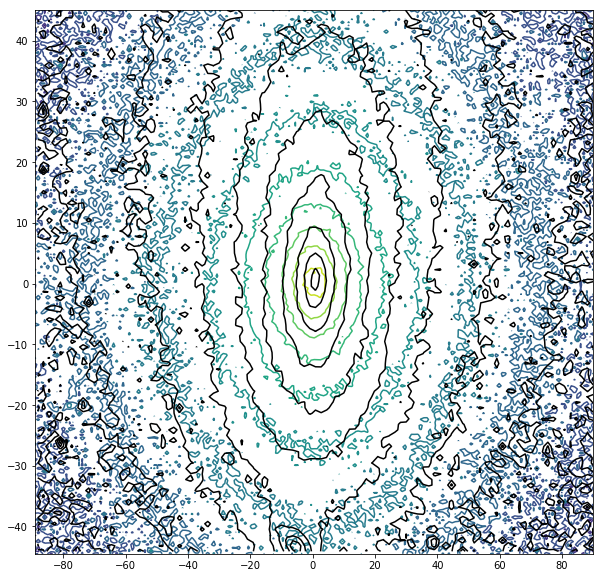

In [353]:



#plt.contour (X_lim,Y_lim,New_band ,colors='k');
fig, ax = plt.subplots(figsize=(10,10))

print(len(x_bin_b) , len(y_bin_b), len(J_facts_b))



x_con = np.delete(x_bin_b,0)
y_con = np.delete(y_bin_b,0)

x_con_d = np.delete(x_bin,0)
y_con_d = np.delete(y_bin,0)

#plt.contour (x_con , y_con, J_facts_b, levels = 12 );

#plt.contour (x_con_d , y_con_d, J_facts, colors = 'k' , levels = 12);


plt.contour  ( x_con ,y_con, J_facts_b.T, levels = 12 );

plt.contour (  x_con_d ,y_con_d,J_facts.T, colors = 'k' , levels = 12);




print(New_band[0])
print(X_lim[0])

print(len(b_s_b))
#plt.contour( Angle_weighting_bary_new_s_conv_f, colors = 'k')


#plt.contour(xx,yy,hist)

#levelsint or array-like, optional
#Determines the number and positions of the contour lines / regions.

#If an int n, use MaxNLocator, which tries to automatically choose no more than n+1 "nice" contour levels between vmin and vmax.

#If array-like, draw contour lines at the specified levels. The values must be in increasing order.

358


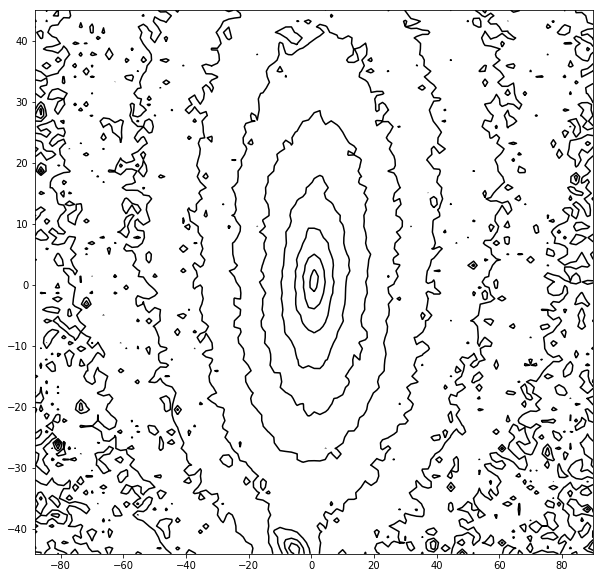

In [352]:
fig, ax = plt.subplots(figsize=(10,10))
path1 =  "/Users/danmckeown/Contoursjuliet.png" 

#plt.contour(x_con_d,y_con_d,J_facts,colors = 'k',levels = 12)

plt.contour(x_con_d,y_con_d,J_facts.T,colors = 'k',levels = 12)

#plt.contour(y_con_d,x_con_d,J_facts, levels = 12)

print(len(hist))


plt.savefig(path +'Contours'+str(halo)+'.png', bbox_inches='tight')

In [216]:
import cv2
path1 =  "/Users/danmckeown/Contoursjuliet.png" 



image = cv2.imread(path1)

window_name = 'Image'


center_coordinates = (0, 0)
  
axesLength = (1, 5)
  
angle = 0
  
startAngle = 0
  
endAngle = 360
   
# Red color in BGR
#color = 'red'
color = (0, 0, 255)
      
# Line thickness of 5 px
thickness = 5
   
# Using cv2.ellipse() method
# Draw a ellipse with red line borders of thickness of 5 px
image = cv2.ellipse(image, center_coordinates, axesLength,
           angle, startAngle, endAngle, color, thickness)
   
# Displaying the image 
cv2.imshow(window_name, image) 




# Test code for contours

In [426]:



def hammer_projection(Phi_deg_array, Theta_deg_array , Final_weighting, plot_bins,lower_limit,upper_limit,file_name,color_map,title,x_lim,y_lim,run_type,wave_type):
      
    
    lz = 180
    #sampling of aitoff projection
    #RA,l, or Lambda Sgr
    binner1 = np.linspace(-90.,90.,plot_bins)
    #DEC, b, or B Sgr
    binner2 = np.linspace(-45.,45.,plot_bins)
    fig, ax = plt.subplots()#create figure in inches


    ### Moment AT.Project is used
    l, b = at.project(Phi_deg_array,Theta_deg_array,lz)

    #Create density map
    #img, xbins,ybins = np.histogram2d(ra,dec, weights = Angle_weighting_NFW, bins=(binner1,binner2) )
    
    img, xbins,ybins = np.histogram2d(l,b, weights = Final_weighting, bins=(binner1,binner2) )

    img = np.log10(img)
    print( 'len binner') 
    print(len(binner1))

    dark_only_vmax = np.max(img)
    dark_only_vmin = np.percentile(img, 25)
    
    print(np.max(Final_weighting))
    print(np.median(Final_weighting))
    print(np.percentile(Final_weighting, 25))
    print(np.min(img))

    #Import a module to make minor ticks
    from matplotlib.ticker import AutoMinorLocator
    #Set up to tell matplotlib to autoselect minor tick locations
    minorLocator   = AutoMinorLocator()

    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)


    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)
    ax.set_ylim([-25.,90.])
    ax.set_ylabel('DEC',fontsize=18)
    ax.set_xlabel('RA',fontsize=18)

    #fig.gca().invert_xaxis()


    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(12.,6.))#create figure in inches
    #plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    
    plot = ax.imshow(img.T,origin='lower',
                     cmap=plt.cm.binary,interpolation='bicubic',aspect='auto' #try a different interpolation method for the image
                     ,vmin = lower_limit, vmax = upper_limit)
    
    
    #Add a nice little color bar
    cbar = fig.colorbar(plot)
    cbar.set_label('Density of Dark Matter')
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on

    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    fig.gca().get_xaxis().set_visible(False)
    fig.gca().get_yaxis().set_visible(False)
    fig.gca().invert_xaxis()


    import matplotlib as mat
    #create a figure to plot the histogram on
    
    
    fig, ax = plt.subplots(figsize=(14.,10.))#create figure in inches
    #create a colorbar axis
    cax, kw = mat.colorbar.make_axes(ax,pad=0,shrink=1.0,location='top',fontsize = 14)


    #imshow will also do RGB if you feed it a 3d or 4d array ( the last dimension being opcacity)
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap= color_map,#try a different color scheme for the image
                     interpolation='bilinear',aspect='auto', 
                     vmin = lower_limit, vmax = upper_limit)
    
    
    plt.contour (New_band ,colors='k');
    
    #Add a nice little color bar
    cbar = fig.colorbar(plot,cax=cax,orientation='horizontal')
    
    cbar.set_label(title, fontsize = 25 , y = 1.28 )
    
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=20) 
    
    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )
    mpl.pyplot.text( x_lim[0],y_lim[0],  wave_type , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[1],y_lim[1], str(halo) , fontsize = 34, color = 'black' )

    mpl.pyplot.text( x_lim[2],y_lim[2],  run_type , fontsize = 34, color = 'black' )
   
    #cbar.ax.set_xticklabels()
    #put a gid on the plot 
    
    
    ### Comment at.gridlines out 
    #at.gridlines(lz,fig,ax)
        
    #ax.contour (  x_con_d ,y_con_d,J_facts.T, colors = 'k' , levels = 12);
    
    
    
    #ax.contour  ( x_con ,y_con, J_facts_b.T, colors = 'k', levels = 12 );

    
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=8)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #because it drops all axes for whatever reason
  #  cax.get_xaxis().set_visible(True)
    #ax.set_xlim([90.,-90.])
    
    ax.set_xlim([-90.,90.])
    
    ax.set_ylim([-45.,45.])
    
    
    plt.savefig(path + '/' +file_name_of_hammer+wave_type+str(halo)+'.png')
    
    
    
    print ('printing max value of DJ/DO')
    print (np.max(img))
    print ('printing x and y bins')
    # return xbins,ybins,img,l,b, Final_weighting
    
    return xbins,ybins















In [86]:
#USED to project Aitoff data points and grid lines (assumes input in degrees)
import numpy as np
import matplotlib.pyplot as plt


degrad = np.pi/180.

# THIS IS FROM THE ACTUAL PROGRAM I USE l, b = at.project(Phi_deg_dark_array,Theta_deg_dark_array,lz)


def project(li,bi,lz):
   sa = li-lz

   alpha2 = sa*degrad/2.
   delta = bi*degrad
   
   r2 = np.sqrt(2.)
   f = 2.*r2/np.pi
   
   cdec = np.cos(delta)
   denom = np.sqrt(1.+cdec*np.cos(alpha2))
   
   xx = cdec*np.sin(alpha2)*2.*r2/denom
   yy = np.sin(delta)*r2/denom
   
   xx = xx*(1./degrad)/f
   yy = yy*(1./degrad)/f


   return xx,yy


def project_grid(li,bi):
   
   sa = -(li-180.) #UNCOMENT lz=0
      
   alpha2 = sa*degrad/2.
   delta = bi*degrad  
   r2 = np.sqrt(2.)
   f = 2.*r2/np.pi
   
   cdec = np.cos(delta)
   denom = np.sqrt(1.+cdec*np.cos(alpha2))
   
   xx = cdec*np.sin(alpha2)*2.*r2/denom
   yy = np.sin(delta)*r2/denom
   
   xx = xx*(1./degrad)/f
   yy = yy*(1./degrad)/f
   return xx,yy



def gridlines(lz,fig,ax):


   Lex = np.linspace(0,360,9)
   print(Lex)
   Lex_1 = np.asarray([  180 ,225 , 270, 315, 0, 45, 90, 135, 180])
   Bex = np.linspace(0,180,180)-90.
   Lex1 = np.linspace(0,360,360)
   Bex1 = np.linspace(0,180,7)-90.
   Lgrid,Bgrid = np.meshgrid(Lex,Bex)
   Lgrid1,Bgrid1 = np.meshgrid(Lex1,Bex1)
   X,Y = project_grid(Lgrid,Bgrid)
  
   XX,YY = project_grid(Lgrid1,Bgrid1)
# uncomment for contour plots
   ax.plot(X,Y,'--',color='black')
   ax.plot(XX.T,YY.T,'--',color='black')

   for i in range(len(Lex)):
      if Lex[i] <= lz:
         fitter = X[int(X.shape[0]/2),Lex.size-1-i]-8
      else:
         fitter = X[int(X.shape[0]/2),Lex.size-1-i]+3
      Lex[i] = Lex[i]-180.-lz
      if Lex[i] < 0:
         Lex[i]=Lex[i]+360.
      if Lex[i] != 360.:
   
         ax.text(fitter,0,str(int(Lex_1[i])),fontsize=18,rotation=270,color= 'white')
         print(str(int(Lex[i])))
   for i in range(len(Bex1)):
      if Bex1[i] > 0.:
         fitter = YY[i,int(len(YY[i])/2)]+1
      else:
         fitter = YY[i,int(len(YY[i])/2)]-6
      ax.text(1,fitter,str(int(Bex1[i])),fontsize=18, color = 'white')
   fig.gca().get_xaxis().set_visible(False)
   fig.gca().get_yaxis().set_visible(False)





def air_plot(Lex,Bex,Lex1,Bex1,X,Y,XX,YY,lz):

   plt.plot(X,Y,color='black')
   plt.plot(XX.T,YY.T,color='black')


   #GRID LABELS

   for i in range(len(Lex)):
      if Lex[i] <= lz:
         fitter = XX[i]-8
      else:
         fitter = XX[i]+3
      if Lex[i] < 0:
         Lex[i]=Lex[i]+360
      if Lex[i] != 360.:
   
         plt.text(fitter,0,str(int(Lex[i])),fontsize=12,rotation=90)
   
   for i in range(len(Bex1)):
      if Bex1[i] > 0.:
         fitter = YY1[i]+1
      else:
         fitter = YY1[i]-6
      plt.text(1,fitter,str(int(Bex1[i])),fontsize=12)
   #END GRID LABELS


In [ ]:
print(x_bin_b)
x_bin_new_b = x_bin_b[:-1]
y_bin_new_b = y_bin_b[:-1]

In [ ]:
np.save(path+"/"+'xbin_b'+str(halo)+'.npy',x_bin_new_b)
np.save(path+"/"+'ybin_b'+str(halo)+'.npy',y_bin_new_b)
np.save(path+"/"+'Jfacts_b'+str(halo)+'.npy',J_facts_b)



# Now interpolate remaining bary radii and combine this vel disp data with Data above to make full weighted array

In [ ]:

dispersion_dark_sq = 2.0 * dispersion_dark_basic * dispersion_dark_basic

dispersion_bary_sq = 2.0 * dispersion_bary_basic * dispersion_bary_basic


# Create filename to send 


dm_only_file_name_p_new = '/vel_dm_only_p_wave_leftover'+str(halo)

vel_dm_only_p_wave = local_velocity_disp_weighting_p(dm_only_file_name_p_new, leftover_radii_D,  radial_bins_dark,dispersion_dark_sq)



dark_bary_file_name_p_new = '/vel_bary_p_wave_'+str(halo)

vel_bary_p_wave = local_velocity_disp_weighting_p(dark_bary_file_name_p_new, leftover_radii_B, radial_bins_bary , dispersion_bary_sq)
          

In [ ]:
print(len(vel_bary_p_wave))
print(len(vel_dm_only_p_wave))





vel_dm_only_p_wave_short = np.asarray(vel_dm_only_p_wave)
vel_bary_p_wave_short = np.asarray(vel_bary_p_wave)
vel_dm_only_p_wave_short_f = vel_dm_only_p_wave_short/(( 2.99792458e5)**2 )
vel_bary_p_wave_short_f = vel_bary_p_wave_short/(( 2.99792458e5)**2 )

# Now combine the two velocity disp^2 arrays into one and map it out 

In [ ]:
dispersion_dark_sq_Fin = np.asarray(dispersion_dark_sq_F) 

dispersion_bary_sq_Fin = np.asarray(dispersion_bary_sq_F)  


final_dm_p_weight_FINAL = np.concatenate((dispersion_dark_sq_Fin, vel_dm_only_p_wave_short_f))


final_bary_p_weight_FINAL = np.concatenate((dispersion_bary_sq_Fin, vel_bary_p_wave_short_f ))


In [ ]:
print(len(vel_dm_only_p_wave_short_f))
print(len(vel_bary_p_wave_short_f))


In [ ]:
print ( np.divide(v_mag_dark_converted    , final_dm_p_weight_FINAL ))

In [ ]:
final_dm_p_weight_F = final_dm_p_weight_FINAL * rho_local_times_mass_dm_only

plot_bins = 180


final_dm_p_weight_Fin = (  final_dm_p_weight_F * conversion ) 



Phi_dark_p,Theta_dark_p,radius_dark_p,Angle_weighting_dark_p,Cos_Psi_dark_p = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_p_weight_Fin )


Angle_weighting_dark_p_conv   =   (Angle_weighting_dark_p)  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 

Theta_deg_dark_array_p, Phi_deg_dark_array_p  =  Angle_convert( Theta_dark_p,Phi_dark_p)



In [ ]:
# tested  for 0,180
plot_bins = 180


lower_limit,upper_limit = 14.5, 17.5

file_name_of_hammer = 'Hammer_dm_only_p_wave_old'


title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 



    
x_lim = [14.6, 14.6 , 17.0,16.9]

y_lim = [11.7, -18.6, 11.7]

run_type = 'DMO'

wave_type = 'p-wave'

calc = 'Maxwellian'



x_bin,y_bin = hammer_projection_new(Phi_deg_dark_array_p,Theta_deg_dark_array_p ,Angle_weighting_dark_p_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title, x_lim,y_lim,run_type ,wave_type,calc)

#print(x_bin,y_bin)

In [ ]:
plot_bins = 180

final_bary_p_weight_F = final_bary_p_weight_FINAL * rho_local_times_mass_dm_bary

plot_bins = 180


final_bary_p_weight_Fin = (  final_bary_p_weight_F * conversion ) 




Phi_bary_p, Theta_bary_p, radius_bary_p, Angle_weighting_bary_p ,Cos_Psi_bary_p = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d,final_bary_p_weight_Fin )



Angle_weighting_bary_p_conv = ( Angle_weighting_bary_p)  /  ( 4. * np.pi  /  ( plot_bins * plot_bins)) 


Theta_deg_bary_array_p, Phi_deg_bary_array_p  =  Angle_convert( Theta_bary_p, Phi_bary_p)


In [ ]:
# tested  for 0,180
plot_bins = 180
title = 'p-wave FIRE' + ''+ ' Log(Js}) Gev^2 cm^-5  Sr^{-1}'
lower_limit,upper_limit = 14.5, 19.5



title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'


x_lim = [14.6, 14.6 , 17.0,16.9]

y_lim = [11.7, -18.6, 11.7]


run_type = 'FIRE'

wave_type = 'p-wave'

calc = 'Maxwellian'


file_name_of_hammer = 'Hammer_bary_p_wave_old'

hammer_projection_new(Phi_deg_bary_array_p,  Theta_deg_bary_array_p,   Angle_weighting_bary_p_conv , plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title, x_lim, y_lim,run_type , wave_type,calc)



#print(x_bin,y_bin)

# Now find the same for v_mag **2

In [ ]:
v_mag_dark_final_sq = v_mag_dark * v_mag_dark


v_mag_dark_final_sq = (v_mag_dark_final_sq) / (( 2.99792458e5)**2 ) 

In [ ]:
final_dm_p_weight_mag = v_mag_dark_final_sq * rho_local_times_mass_dm_only

plot_bins = 180


final_dm_p_weight_mag_F = (  final_dm_p_weight_mag * conversion ) 



Phi_dark_p_mag,Theta_dark_p_mag,radius_dark_p_mag,Angle_weighting_dark_p_mag,Cos_Psi_dark_p_mag = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_p_weight_mag_F )


Angle_weighting_dark_p_mag_conv   =   (Angle_weighting_dark_p_mag)  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 

Theta_deg_dark_array_p_mag, Phi_deg_dark_array_p_mag  =  Angle_convert( Theta_dark_p_mag,Phi_dark_p_mag)



In [ ]:
# tested  for 0,180
plot_bins = 180


lower_limit,upper_limit = 14.5, 17.5

file_name_of_hammer = 'Hammer_dm_only_p_wave_old_mag'


title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 



x_lim = [14.6, 14.6 , 17.0,16.9]

y_lim = [11.7, -18.6, 11.7]

run_type = 'DMO'

wave_type = 'p-wave'

calc = ''




x_bin,y_bin = hammer_projection_new(Phi_deg_dark_array_p_mag,Theta_deg_dark_array_p_mag ,Angle_weighting_dark_p_mag_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title, x_lim,y_lim,run_type ,wave_type,calc)

#print(x_bin,y_bin)

In [ ]:
v_mag_bary_final_sq = v_mag_bary * v_mag_bary


v_mag_bary_final_sq = (v_mag_bary_final_sq) / (( 2.99792458e5)**2 ) 

In [ ]:
final_bary_p_weight_mag = v_mag_bary_final_sq * rho_local_times_mass_dm_bary

plot_bins = 180


final_bary_p_weight_mag_F = (  final_bary_p_weight_mag * conversion ) 



Phi_bary_p_mag,Theta_bary_p_mag,radius_bary_p_mag,Angle_weighting_bary_p_mag,Cos_Psi_bary_p_mag = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d, final_bary_p_weight_mag_F )


Angle_weighting_bary_p_mag_conv   =   (Angle_weighting_bary_p_mag)  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 

Theta_deg_bary_array_p_mag, Phi_deg_bary_array_p_mag  =  Angle_convert( Theta_bary_p_mag,Phi_bary_p_mag)



In [ ]:
# tested  for 0,180
plot_bins = 180


lower_limit,upper_limit = 14.5, 17.5

file_name_of_hammer = 'Hammer_bary_p_wave_old_mag'


title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 



x_lim = [14.6, 14.6 , 17.0,16.9]

y_lim = [11.7, -18.6, 11.7]

run_type = 'FIRE'

wave_type = 'p-wave'

calc = ""



x_bin,y_bin = hammer_projection_new(Phi_deg_bary_array_p_mag,Theta_deg_bary_array_p_mag ,Angle_weighting_bary_p_mag_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title, x_lim,y_lim,run_type ,wave_type,calc)

#print(x_bin,y_bin)

# D Weights

In [ ]:

dispersion_dark_4 = (48./9.)* (dispersion_dark_basic)**4 

dispersion_bary_4 = (48./9.)* (dispersion_bary_basic)**4


# Create filename to send 


dm_only_file_name_d_new = '/vel_dm_only_d_wave_leftover'+str(halo)

vel_dm_only_d_wave = local_velocity_disp_weighting_d(dm_only_file_name_d_new, leftover_radii_D,  radial_bins_dark,dispersion_dark_4)



dark_bary_file_name_d_new = '/vel_bary_p_wave_'+str(halo)

vel_bary_d_wave = local_velocity_disp_weighting_d(dark_bary_file_name_d_new, leftover_radii_B, radial_bins_bary , dispersion_bary_4)
          

In [ ]:
print(len(vel_bary_d_wave))
print(len(vel_dm_only_d_wave))





vel_dm_only_d_wave_short_4 = np.asarray(vel_dm_only_d_wave)

vel_bary_d_wave_short_4 = np.asarray(vel_bary_d_wave)

vel_dm_only_d_wave_short_f = vel_dm_only_d_wave_short_4/(( 2.99792458e5)**4 )

vel_bary_d_wave_short_f = vel_bary_d_wave_short_4/(( 2.99792458e5)**4 )

In [ ]:

dispersion_dark_4_Fin = np.asarray(dispersion_dark_fourth_F ) 

dispersion_bary_4_Fin = np.asarray(dispersion_bary_fourth_F )  


final_dm_d_weight_FINAL = np.concatenate((dispersion_dark_4_Fin, vel_dm_only_d_wave_short_f))


final_bary_d_weight_FINAL = np.concatenate((dispersion_bary_4_Fin, vel_bary_d_wave_short_f ))


In [ ]:
final_dm_d_weight  = ( final_dm_d_weight_FINAL *rho_local_times_mass_dm_only)

plot_bins = 180


final_dm_d_weight_Fin = (  final_dm_d_weight * conversion ) 
  



Phi_dark_d, Theta_dark_d, radius_dark_d, Angle_weighting_dark_d, Cos_Psi_dark_d = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_d_weight_Fin )


plot_bins = 180


Angle_weighting_dark_new_d_conv = ( Angle_weighting_dark_d )  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 



Theta_deg_dark_array_d, Phi_deg_dark_array_d  =  Angle_convert( Theta_dark_d , Phi_dark_d)







In [ ]:
# tested  for 0,180
plot_bins = 180

title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'





x_lim = [8.6, 8.6 , 11.0,10.9]

y_lim = [6.3, -24.9, 6.3]

run_type = 'DMO'

wave_type = 'd-wave'

calc = "Maxwellian"

lower_limit,upper_limit = 8.5,11.5

file_name_of_hammer = 'hammer_dm_only_'


x_bin,y_bin = hammer_projection_new(Phi_deg_dark_array_d , Theta_deg_dark_array_d ,Angle_weighting_dark_new_d_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title,x_lim, y_lim,run_type, wave_type,calc)

#print(x_bin,y_bin)

In [ ]:
plot_bins = 180

final_bary_d_weight  = ( final_bary_d_weight_FINAL *rho_local_times_mass_dm_bary)


final_bary_d_weight_Fin =  final_bary_d_weight * conversion   

Phi_bary_d,Theta_bary_d,radius_bary_d,Angle_weighting_bary_d,Cos_Psi_bary_d = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d, final_bary_d_weight_Fin )



Angle_weighting_bary_new_d_conv = ( Angle_weighting_bary_d   ) /  ( 4 * np.pi/  ( plot_bins * plot_bins)) 
#Angle_weighting_bary_new_dj_do = ( Angle_weighting_bary * conversion )  # /( 4 * np.pi/  ( plot_bins * plot_bins)) 


Theta_deg_bary_array_d, Phi_deg_bary_array_d  =  Angle_convert( Theta_bary_d, Phi_bary_d )


In [ ]:
# tested  for 0,180
plot_bins = 180
title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'


x_lim = [8.6, 8.6 , 11.0,10.9]

y_lim = [6.3, -24.9, 6.3]

run_type = 'FIRE'

wave_type = 'd-wave'

calc = "Maxwellian"


lower_limit,upper_limit = 8.5, 11.5

file_name_of_hammer = 'hammer_bary_'


hammer_projection_new(Phi_deg_bary_array_d , Theta_deg_bary_array_d ,   Angle_weighting_bary_new_d_conv , plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title, x_lim, y_lim,run_type, wave_type,calc)



#print(x_bin,y_bin)


# Now find the same for v_mag **4

In [ ]:
v_mag_dark_final_4th = (v_mag_dark)**4


v_mag_dark_final_4th = (v_mag_dark_final_4th) / (( 2.99792458e5)**4 ) 

In [ ]:
final_dm_d_weight_mag  = ( v_mag_dark_final_4th *rho_local_times_mass_dm_only)

plot_bins = 180


final_dm_d_weight_Fin_mag = (  final_dm_d_weight_mag * conversion ) 
  



Phi_dark_d_mag, Theta_dark_d_mag, radius_dark_d_mag, Angle_weighting_dark_d_mag, Cos_Psi_dark_d_mag = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_d_weight_Fin_mag )


plot_bins = 180


Angle_weighting_dark_new_d_conv_mag = ( Angle_weighting_dark_d_mag )  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 



Theta_deg_dark_array_d_mag, Phi_deg_dark_array_d_mag  =  Angle_convert( Theta_dark_d_mag , Phi_dark_d_mag)







In [ ]:
# tested  for 0,180
plot_bins = 180

title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'





x_lim = [8.6, 8.6 , 11.0,10.9]

y_lim = [6.3, -24.9, 6.3]

run_type = 'DMO'

wave_type = 'd-wave'

calc = ""


lower_limit,upper_limit = 8.5,11.5

file_name_of_hammer = 'hammer_dm_only_mag'


x_bin,y_bin = hammer_projection_new(Phi_deg_dark_array_d_mag , Theta_deg_dark_array_d_mag ,Angle_weighting_dark_new_d_conv_mag, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title,x_lim, y_lim,run_type, wave_type,calc)

#print(x_bin,y_bin)

In [ ]:
v_mag_bary_final_4th = (v_mag_bary)**4


v_mag_bary_final_4th = (v_mag_bary_final_4th) / (( 2.99792458e5)**4 ) 

In [ ]:
final_bary_d_weight_mag  = ( v_mag_bary_final_4th *rho_local_times_mass_dm_bary)

plot_bins = 180


final_bary_d_weight_Fin_mag = (  final_bary_d_weight_mag * conversion ) 
  



Phi_bary_d_mag, Theta_bary_d_mag, radius_bary_d_mag, Angle_weighting_bary_d_mag, Cos_Psi_bary_d_mag = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d, final_bary_d_weight_Fin_mag )


plot_bins = 180


Angle_weighting_bary_new_d_conv_mag = ( Angle_weighting_bary_d_mag )  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 



Theta_deg_bary_array_d_mag, Phi_deg_bary_array_d_mag  =  Angle_convert( Theta_bary_d_mag , Phi_bary_d_mag)







In [ ]:
# tested  for 0,180
plot_bins = 180

title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'






x_lim = [8.6, 8.6 , 11.0,10.9]

y_lim = [6.3, -24.9, 6.3]

run_type = 'FIRE'

wave_type = 'd-wave'
calc = ""


lower_limit,upper_limit = 8.5,11.5

file_name_of_hammer = 'hammer_bary_only_mag'


x_bin,y_bin = hammer_projection_new(Phi_deg_bary_array_d_mag , Theta_deg_bary_array_d_mag ,Angle_weighting_bary_new_d_conv_mag, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title,x_lim, y_lim,run_type, wave_type,calc)

#print(x_bin,y_bin)

# Create J factor Plots for Velocity Independent J factors

# 15).

In [ ]:
# TESTING OLD CODE


J_bins = 35   
sin_bins = np.logspace( -2.0, 0, J_bins)

Cos_Psi_bins = np.sqrt(1. - (sin_bins)**2 )

print(np.max((np.degrees(np.arccos(Cos_Psi_dark_s)))))

Cos_Psi_bins_reverse = Cos_Psi_bins[::-1] 

#print(np.degrees(Cos_Psi_bins_reverse))
# BINNING All coordinates within this range
J_factor , bin_edges_psi = np.histogram(Cos_Psi_dark_s,  bins = Cos_Psi_bins_reverse,  weights = Angle_weighting_dark_new_s)

J_factor_reverse = J_factor[::-1]
print((Cos_Psi_bins_reverse))

print(bin_edges_psi)

print(np.degrees(np.arccos(bin_edges_psi)))

d_theta = np.diff(bin_edges_psi )

J_factor = np.array(J_factor,dtype=float ) 
        
    

J_factor_reverse = np.array(J_factor_reverse,dtype=float ) 

solid_angle = (  np.diff(bin_edges_psi ) * 2.0 * np.pi )


solid_angle_r = solid_angle[::-1]


DJ = (J_factor_reverse / solid_angle_r  )


DJ_DO_bins = (np.degrees(np.arccos(bin_edges_psi)))

DJ_DO_bins_final = DJ_DO_bins[::-1]


DJ_DO_bins_final_final =  (    DJ_DO_bins_final[1:] + DJ_DO_bins_final[:-1]) / 2.0 

In [ ]:
print(np.max(np.degrees(Cos_Psi_dark_s)))
print(len(Cos_Psi_dark_s))

print(len(pos_x_dark))





In [ ]:
def coord_trans( x,y,z,d,weights ):

    x = (x + d)
    
    Phi = np.arctan2(y ,x)
    radius = np.sqrt(( x  )*(  x ) + (y )* (y ) + (z )*(z  ) )        
    u = (z  )  / ( radius )
    Theta = np.arccos(u)
    
    Cos_Psi = (x) /(radius)
    
    a = 0.4
    # a is the softening length.  
    
    Angle_weighting =  ( weights) /  (radius + a)**2    # Weights can either be in terms of rho* density  or rho*density *sigma**2,  or rho* density * sigma**4
    
    
    return Phi,Theta,radius,Angle_weighting,Cos_Psi

In [ ]:






import numpy as np
from astropy.modeling.models import Sersic1D
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111, xscale='log', yscale='log')
s1 = Sersic1D(amplitude=1, r_eff=5)
r=np.arange(0, 100, .01)

for n in range(1, 10):
     s1.n = n
     plt.plot(r, s1(r), color=str(float(n) / 15))

plt.axis([1e-1, 30, 1e-2, 1e3])
plt.xlabel('log Radius')
plt.ylabel('log Surface Brightness')
plt.text(.25, 1.5, 'n=1')
plt.text(.25, 300, 'n=10')
plt.xticks()
plt.yticks()
plt.show()


In [ ]:
import numpy as np
from astropy.modeling.models import Sersic1D
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111, xscale='log', yscale='log')
s1 = Sersic1D(amplitude=1, n = 1,r_eff=5)
r_fill =np.arange(0, 100, .01)
x_fill = np.arange(0,100,0.01)
Cos_Psi = x_fill / r_fill

plt.plot(r, s1(r), color=str(float(n) / 15))

plt.axis([1e-1, 30, 1e-2, 1e3])
plt.xlabel('log Radius')
plt.ylabel('log Surface Brightness')

plt.xticks()
plt.yticks()
plt.show()

In [ ]:
print(np.degrees(np.arccos(1 /np.sqrt(3))))
                 

In [ ]:
def J_( Cos_Psi, Final_weights):   
# Cos_Psi is x/r  ( an array of coords)    
    J_bins = 35    

    

    sin_bins = np.logspace( -2.0, 0, J_bins)

    Cos_Psi_bins = np.sqrt(1. - (sin_bins)**2 )


    Cos_Psi_bins_reverse = Cos_Psi_bins[::-1]    
    
    
    #Cos_Psi_bins_reverse = Cos_Psi_bins[::-1]


    J_factor , bin_edges_psi = np.histogram(Cos_Psi,  bins = Cos_Psi_bins_reverse,  weights = Final_weights)
    # Where the particles are, their weights, the bins
    
    print('bin check')
    J_factor_reverse = J_factor[::-1]
    
    print(np.degrees(bin_edges_psi))
    bin_edges_psi_reverse = bin_edges_psi[::-1]
    
    print(Cos_Psi_bins_reverse)
    
    J_factor = np.array(J_factor,dtype=float ) 
        
    
    J_factor_reverse = np.array(J_factor_reverse,dtype=float ) 
    #print('bin edges')
    #print(bin_edges_psi)
    
    bin_edges_psi_final = np.degrees(np.arccos(bin_edges_psi)) 
    
    #bin_edges_psi_final =  bin_edges_psi_final[:-1]
    
    
    bin_edges_psi_final_reverse = bin_edges_psi_final[::-1]
    
    d_theta = np.diff(bin_edges_psi_final_reverse )
    #bin_edges_psi_final_reverse = bin_edges_psi_final_reverse[:-1]
    
    print('printing bins')
    print(bin_edges_psi_final_reverse)
    
    print(len( bin_edges_psi_final  ), len( J_factor))

    J_factor_sum = np.cumsum(J_factor_reverse,axis=0)



    
    return   J_factor, J_factor_reverse,J_factor_sum, bin_edges_psi,bin_edges_psi_reverse, bin_edges_psi_final, bin_edges_psi_final_reverse, d_theta

# 16).

In [ ]:

def J_factor_plots( reverse_dark_bins  ,  reverse_bary_bins,  J_factor_dark_sum, J_factor_bary_sum, x_lim, y_lim, wave_type,y_minimum ,y_maximum  ):
 
  
    ax_font = 45
    txt_font = 45
    lw = 4


    fig, ax = plt.subplots(figsize=(13,13))
    ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

    ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

    plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

    plt.ylabel(r'$J (< \Psi) \, [ GEV ^{2} cm^{-5} ]$', fontsize = 30)
  

    mpl.pyplot.text( x_lim,y_lim, str(halo)+':'+ wave_type , fontsize = 30, color = 'black' )

    #plt.semilogy(degree_same, J_factor_sum,color = 'Blue',linewidth= 6,label = "" )
    plt.semilogy(reverse_dark_bins, J_factor_dark_sum,color =  CB_color_cycle[0],linewidth= 6,label = " DMO " )
    plt.semilogy(reverse_bary_bins, J_factor_bary_sum,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )
    plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

    plt.xlim([0,20])
    #plt.ylim ( [10**17 , 10 **25])
    plt.savefig(path +'/J_cumulative'+str(wave_type)+str(halo)+'.png',  bbox_inches='tight' )
    plt.show()



# 17

In [ ]:

def J_factor_plots_new( reverse_dark_bins  ,reverse_dark_bins_mag,  reverse_bary_bins, reverse_bary_bins_mag, J_factor_dark_sum, J_factor_dark_sum_mag  , J_factor_bary_sum, J_factor_bary_sum_mag, x_lim, y_lim, wave_type,y_minimum ,y_maximum  ):
 
  
    ax_font = 45
    txt_font = 45
    lw = 4


    fig, ax = plt.subplots(figsize=(13,13))
    ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

    ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

    plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

    plt.ylabel(r'$J (< \Psi) \, [ GEV ^{2} cm^{-5} ]$', fontsize = 30)
  

    mpl.pyplot.text( x_lim,y_lim, str(halo)+':'+ wave_type , fontsize = 30, color = 'black' )

    #plt.semilogy(degree_same, J_factor_sum,color = 'Blue',linewidth= 6,label = "" )
    plt.semilogy(reverse_dark_bins, J_factor_dark_sum,color =  CB_color_cycle[0],linewidth= 6,label = " DMO Maxwellian " )
    plt.semilogy(reverse_bary_bins, J_factor_bary_sum,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE Maxwellian" )
    plt.semilogy(reverse_dark_bins_mag, J_factor_dark_sum_mag,color =  CB_color_cycle[0],linewidth= 3,label = " DMO DIRECT ", linestyle='dashed' )
    plt.semilogy(reverse_bary_bins_mag, J_factor_bary_sum_mag,color =  CB_color_cycle[7],linewidth= 3,label = "FIRE DIRECT" , linestyle='dashed')
    
    
    plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

    plt.xlim([0,20])
    #plt.ylim ( [10**17 , 10 **25])
    plt.savefig(path +'/J_cumulative'+str(wave_type)+str(halo)+'.png',  bbox_inches='tight' )
    plt.show()


# 18). 

In [ ]:
def DJ_plots(d_theta,  bin_edges_psi,  J_factor_reverse):

    d_theta_final=   np.radians((d_theta)) 

    print(len((bin_edges_psi_dark )))


    solid_angle = (  np.diff(bin_edges_psi ) * 2.0 * np.pi )


    solid_angle_r = solid_angle[::-1]


    DJ = (J_factor_reverse / solid_angle_r  )


    DJ_DO_bins = (np.degrees(np.arccos(bin_edges_psi)))

    DJ_DO_bins_final = DJ_DO_bins[::-1]


    DJ_DO_bins_final_final =  (    DJ_DO_bins_final[1:] + DJ_DO_bins_final[:-1]) / 2.0 

    return DJ_DO_bins_final_final , DJ 

# 19).

In [ ]:
def DJ_plots_new(d_theta,  bin_edges_psi,  J_factor_reverse):

    d_theta_final=   np.radians((d_theta)) 

    print(len((bin_edges_psi_dark )))


    solid_angle = (  np.diff(bin_edges_psi ) * 2.0 * np.pi )


    solid_angle_r = solid_angle[::-1]


    DJ = (J_factor_reverse / solid_angle_r  )


    DJ_DO_bins = (np.degrees(np.arccos(bin_edges_psi)))

    DJ_DO_bins_final = DJ_DO_bins[::-1]


    DJ_DO_bins_final_final =  (    DJ_DO_bins_final[1:] + DJ_DO_bins_final[:-1]) / 2.0 

    return DJ_DO_bins_final_final , DJ 

# S wave Analysis 

In [ ]:
J_factor_dark,J_factor_dark_reverse, J_factor_dark_sum,bin_edges_psi_dark, bin_edges_psi_reverse_dark, bin_edges_psi_final_dark, bin_edges_psi_final_dark_reverse,d_theta_dark  =  J_( Cos_Psi_dark_s, Angle_weighting_dark_new_s )

print(np.min(Cos_Psi_dark_s))


J_factor_bary, J_factor_bary_reverse, J_factor_bary_sum,bin_edges_psi_bary, bin_edges_psi_reverse_bary, bin_edges_psi_final_bary,bin_edges_psi_final_bary_reverse,d_theta_bary =  J_( Cos_Psi_bary_s_f, Angle_weighting_bary_new_s_f)



In [ ]:
bin_edges_psi_final_dark_reverse_s = bin_edges_psi_final_dark_reverse[:-1]
bin_edges_psi_final_bary_reverse_s = bin_edges_psi_final_bary_reverse[:-1]


y_minimum = 1.0e20 
y_maximum = 5.0e23


x_lim = 14

y_lim = 10**20.2


np.save(path+"/"+'J_factor_dark_sum_s'+str(halo)+'.npy',J_factor_dark_sum)
np.save(path+"/"+'J_factor_bary_sum_s'+str(halo)+'.npy',J_factor_bary_sum)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_s'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_s)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_s'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_s) 
        



wave_type = 's-wave'





print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_s )

print ( J_factor_dark_sum)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_s )


print( J_factor_bary_sum  )


print( J_factor_bary_sum[21])
print(J_factor_dark_sum[21])



J_factor_plots( bin_edges_psi_final_dark_reverse_s, bin_edges_psi_final_bary_reverse_s, J_factor_dark_sum,J_factor_bary_sum,x_lim,y_lim,wave_type,y_minimum ,y_maximum )




In [ ]:
# Need to convert DJ_DO_bins_dark_final_final into radii or need to convert radii into Dj_DO_BINS
print(bin_edges_psi_final_dark_reverse_s)

In [ ]:
DJ_DO_bins_dark_final_final, DJ_dark =   DJ_plots(d_theta_dark ,  bin_edges_psi_dark,  J_factor_dark_reverse)

DJ_DO_bins_bary_final_final, DJ_bary =   DJ_plots(d_theta_bary ,  bin_edges_psi_bary,  J_factor_bary_reverse)

print (DJ_DO_bins_dark_final_final, DJ_dark)




In [ ]:
import numpy as np
from astropy.modeling.models import Sersic1D
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111, xscale='log', yscale='log')
s1 = Sersic1D(amplitude= 7e23, r_eff= 8,n = 1.6)
r=np.arange(0, 70, .01)



plt.plot(r, s1(r), color= 'black')

In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(10,10))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.loglog(DJ_DO_bins_dark_final_final, DJ_dark ,color =  CB_color_cycle[0],linewidth= 6,label = " Dark Matter Only " )
plt.loglog(DJ_DO_bins_bary_final_final, DJ_bary  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )
plt.plot(r, s1(r), color= 'black', linewidth= 6,label = "Sersic")

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$ dJ/d \Omega (< \Psi) \, [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
  





plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

mpl.pyplot.text( 0.6,10**21.8, str(halo)+': s-wave', fontsize = 30, color = 'black' )

 
mpl.pyplot.ylim( y_minimum, y_maximum )

  
plt.xlim(    0.6,30 )


y_minimum = 2.0e21 
y_maximum = 1.0e25 

mpl.pyplot.ylim( y_minimum, y_maximum )


np.save(path+"/"+'DJ_DO_bins_s_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final)
np.save(path+"/"+'DJ_DO_bins_s_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final)
np.save(path+"/"+'DJ_DO_s_dark'+str(halo)+'.npy',DJ_dark)
np.save(path+"/"+'DJ_DO_s_bary'+str(halo)+'.npy',DJ_bary) 
    



plt.savefig(path +'dJ_DO_'+'SWAVE'+str(halo)+'.png',  bbox_inches='tight')


plt.show()

In [ ]:
import numpy as np
from astropy.modeling.models import Sersic1D
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111, xscale='log', yscale='log')
s1 = Sersic1D(amplitude= 1e20, r_eff= 300,n = 20)
r=np.arange(0, 300, .01)



plt.plot(r, s1(r), color= 'black')

plt.axis([1e-1, 300, 1e20, 1e25])
plt.xlabel('log Radius')
plt.ylabel('log Surface Brightness')

plt.xticks
plt.yticks
plt.show()


# P wave Analysis 

In [ ]:
J_factor_dark_p ,J_factor_dark_reverse_p, J_factor_dark_sum_p   ,bin_edges_psi_dark_p , bin_edges_psi_reverse_dark_p , bin_edges_psi_final_dark_p  , bin_edges_psi_final_dark_reverse_p , d_theta_dark_p  =  J_( Cos_Psi_dark_p, Angle_weighting_dark_p )

print(np.min(Cos_Psi_dark_p))


J_factor_bary_p, J_factor_bary_reverse_p ,   J_factor_bary_sum_p , bin_edges_psi_bary_p  , bin_edges_psi_reverse_bary_p  ,   bin_edges_psi_final_bary_p  ,  bin_edges_psi_final_bary_reverse_p ,  d_theta_bary_p =  J_(Cos_Psi_bary_p ,  Angle_weighting_bary_p )



#### now for abs velocity versions

In [ ]:
J_factor_dark_p_mag ,J_factor_dark_reverse_p_mag, J_factor_dark_sum_p_mag   ,bin_edges_psi_dark_p_mag , bin_edges_psi_reverse_dark_p_mag , bin_edges_psi_final_dark_p_mag  , bin_edges_psi_final_dark_reverse_p_mag , d_theta_dark_p_mag  =  J_( Cos_Psi_dark_p_mag, Angle_weighting_dark_p_mag )

print(np.min(Cos_Psi_dark_p))


J_factor_bary_p_mag, J_factor_bary_reverse_p_mag ,   J_factor_bary_sum_p_mag , bin_edges_psi_bary_p_mag  , bin_edges_psi_reverse_bary_p_mag  ,   bin_edges_psi_final_bary_p_mag  ,  bin_edges_psi_final_bary_reverse_p_mag ,  d_theta_bary_p_mag =  J_(Cos_Psi_bary_p_mag ,  Angle_weighting_bary_p_mag )



In [ ]:
bin_edges_psi_final_dark_reverse_p_final = bin_edges_psi_final_dark_reverse_p[:-1]
bin_edges_psi_final_bary_reverse_p_final = bin_edges_psi_final_bary_reverse_p[:-1]

### mags below

bin_edges_psi_final_dark_reverse_p_final_mag = bin_edges_psi_final_dark_reverse_p_mag[:-1]
bin_edges_psi_final_bary_reverse_p_final_mag = bin_edges_psi_final_bary_reverse_p_mag[:-1]



np.save(path+"/"+'J_factor_dark_sum_p'+str(halo)+'.npy',J_factor_dark_sum_p)
np.save(path+"/"+'J_factor_bary_sum_p'+str(halo)+'.npy',J_factor_bary_sum_p)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_p'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_p_final)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_p'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_p_final) 
        

    
# mags below

np.save(path+"/"+'J_factor_dark_sum_p_mag'+str(halo)+'.npy',J_factor_dark_sum_p_mag)
np.save(path+"/"+'J_factor_bary_sum_p_mag'+str(halo)+'.npy',J_factor_bary_sum_p_mag)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_p_mag'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_p_final_mag)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_p_mag'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_p_final_mag) 
        


x_lim = 14

y_lim = 10**13.9



wave_type = 'p-wave'


y_minimum = 1.0e13 
y_maximum = 5.0e17

     

print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_p_final )

print ( J_factor_dark_sum_p)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_p_final )


print( J_factor_bary_sum_p  )


print( J_factor_bary_sum_p[21])
print(J_factor_dark_sum_p[21])






J_factor_plots_new( bin_edges_psi_final_dark_reverse_p_final,bin_edges_psi_final_dark_reverse_p_final_mag, bin_edges_psi_final_bary_reverse_p_final,bin_edges_psi_final_bary_reverse_p_final_mag, J_factor_dark_sum_p ,J_factor_dark_sum_p_mag, J_factor_bary_sum_p, J_factor_bary_sum_p_mag, x_lim,y_lim,wave_type,y_minimum,y_maximum )


In [ ]:
DJ_DO_bins_dark_final_final_p, DJ_dark_p =   DJ_plots(d_theta_dark_p ,  bin_edges_psi_dark_p,  J_factor_dark_reverse_p)

DJ_DO_bins_bary_final_final_p, DJ_bary_p =   DJ_plots(d_theta_bary_p ,  bin_edges_psi_bary_p ,  J_factor_bary_reverse_p)


In [ ]:
DJ_DO_bins_dark_final_final_p_mag, DJ_dark_p_mag =   DJ_plots(d_theta_dark_p_mag ,  bin_edges_psi_dark_p_mag,  J_factor_dark_reverse_p_mag)

DJ_DO_bins_bary_final_final_p_mag, DJ_bary_p_mag =   DJ_plots(d_theta_bary_p_mag,  bin_edges_psi_bary_p_mag ,  J_factor_bary_reverse_p_mag)


In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(13,13))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$dJ/d \Omega  [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
    

plt.loglog(DJ_DO_bins_dark_final_final_p, DJ_dark_p ,color =  CB_color_cycle[0],linewidth= 6,label = " DMO Maxwellian",  linestyle='dashed' )
plt.loglog(DJ_DO_bins_bary_final_final_p, DJ_bary_p  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE Maxwellian" ,  linestyle='dashed')
# MAG
plt.loglog(DJ_DO_bins_dark_final_final_p_mag, DJ_dark_p_mag ,color =  CB_color_cycle[0],linewidth= 3,label = " DMO Direct" )
plt.loglog(DJ_DO_bins_bary_final_final_p_mag, DJ_bary_p_mag  ,color =  CB_color_cycle[7],linewidth= 3,label = "FIRE Direct" )




plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

mpl.pyplot.text( 1,10**15.9, str(halo)+': p-wave', fontsize = 30, color = 'black' )

y_minimum = 2.0e15
y_maximum = 5.0e19  

plt.xlim(    0.6,60 )
mpl.pyplot.ylim( y_minimum, y_maximum )

        
np.save(path+"/"+'DJ_DO_bins_p_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_p)
np.save(path+"/"+'DJ_DO_bins_p_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_p)
np.save(path+"/"+'DJ_DO_p_dark'+str(halo)+'.npy',DJ_dark_p)
np.save(path+"/"+'DJ_DO_p_bary'+str(halo)+'.npy',DJ_bary_p)
# MAG
np.save(path+"/"+'DJ_DO_bins_p_dark_mag'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_p_mag)
np.save(path+"/"+'DJ_DO_bins_p_bary_mag'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_p_mag)
np.save(path+"/"+'DJ_DO_p_dark_mag'+str(halo)+'.npy',DJ_dark_p_mag)
np.save(path+"/"+'DJ_DO_p_bary_mag'+str(halo)+'.npy',DJ_bary_p_mag)
        
    
plt.savefig(path +'dJ_DO_'+'PWAVE'+str(halo)+'.png',  bbox_inches='tight') 
    
plt.show()

# D Wave Analysis

In [ ]:
J_factor_dark_d ,J_factor_dark_reverse_d, J_factor_dark_sum_d   ,bin_edges_psi_dark_d , bin_edges_psi_reverse_dark_d , bin_edges_psi_final_dark_d  , bin_edges_psi_final_dark_reverse_d , d_theta_dark_d  =  J_( Cos_Psi_dark_d, Angle_weighting_dark_d )

print(np.min(Cos_Psi_dark_d))


J_factor_bary_d, J_factor_bary_reverse_d ,   J_factor_bary_sum_d , bin_edges_psi_bary_d  , bin_edges_psi_reverse_bary_d  ,   bin_edges_psi_final_bary_d  ,  bin_edges_psi_final_bary_reverse_d ,  d_theta_bary_d =  J_(Cos_Psi_bary_d ,  Angle_weighting_bary_d )








### now for abs versions

In [ ]:
J_factor_dark_d_mag ,J_factor_dark_reverse_d_mag, J_factor_dark_sum_d_mag   ,bin_edges_psi_dark_d_mag , bin_edges_psi_reverse_dark_d_mag , bin_edges_psi_final_dark_d_mag  , bin_edges_psi_final_dark_reverse_d_mag , d_theta_dark_d_mag  =  J_( Cos_Psi_dark_d_mag, Angle_weighting_dark_d_mag )

print(np.min(Cos_Psi_dark_d))


J_factor_bary_d_mag, J_factor_bary_reverse_d_mag ,   J_factor_bary_sum_d_mag , bin_edges_psi_bary_d_mag  , bin_edges_psi_reverse_bary_d_mag  ,   bin_edges_psi_final_bary_d_mag  ,  bin_edges_psi_final_bary_reverse_d_mag ,  d_theta_bary_d_mag =  J_(Cos_Psi_bary_d_mag ,  Angle_weighting_bary_d_mag )



In [ ]:
bin_edges_psi_final_dark_reverse_d_final = bin_edges_psi_final_dark_reverse_d[:-1]
bin_edges_psi_final_bary_reverse_d_final = bin_edges_psi_final_bary_reverse_d[:-1]

### mags below

bin_edges_psi_final_dark_reverse_d_final_mag = bin_edges_psi_final_dark_reverse_d_mag[:-1]
bin_edges_psi_final_bary_reverse_d_final_mag = bin_edges_psi_final_bary_reverse_d_mag[:-1]




x_lim = 3

y_lim = 10**8.3

wave_type = 'd-wave'


y_minimum = 1.0e8
y_maximum = 1.0e13


np.save(path+"/"+'J_factor_dark_sum_d'+str(halo)+'.npy',J_factor_dark_sum_d)
np.save(path+"/"+'J_factor_bary_sum_d'+str(halo)+'.npy',J_factor_bary_sum_d)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_d'+str(halo)+'.npy',  bin_edges_psi_final_dark_reverse_d_final)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_d'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_d_final) 
      
# mags below

np.save(path+"/"+'J_factor_dark_sum_d_mag'+str(halo)+'.npy',J_factor_dark_sum_d_mag)
np.save(path+"/"+'J_factor_bary_sum_d_mag'+str(halo)+'.npy',J_factor_bary_sum_d_mag)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_d_mag'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_d_final_mag)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_d_mag'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_d_final_mag) 
        


    

print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_d_final )

print ( J_factor_dark_sum_d)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_d_final )


print( J_factor_bary_sum_d  )


print( J_factor_bary_sum_d[21])
print(J_factor_dark_sum_d[21])
        
    


J_factor_plots_new( bin_edges_psi_final_dark_reverse_d_final,bin_edges_psi_final_dark_reverse_d_final_mag, bin_edges_psi_final_bary_reverse_d_final,bin_edges_psi_final_bary_reverse_d_final_mag, J_factor_dark_sum_d ,J_factor_dark_sum_d_mag, J_factor_bary_sum_d, J_factor_bary_sum_d_mag, x_lim,y_lim,wave_type,y_minimum,y_maximum )




In [ ]:
DJ_DO_bins_dark_final_final_d, DJ_dark_d =   DJ_plots(d_theta_dark_d ,  bin_edges_psi_dark_d,  J_factor_dark_reverse_d)

DJ_DO_bins_bary_final_final_d, DJ_bary_d =   DJ_plots(d_theta_bary_d ,  bin_edges_psi_bary_d ,  J_factor_bary_reverse_d)


In [ ]:
DJ_DO_bins_dark_final_final_d_mag, DJ_dark_d_mag =   DJ_plots(d_theta_dark_d_mag ,  bin_edges_psi_dark_d_mag,  J_factor_dark_reverse_d_mag)

DJ_DO_bins_bary_final_final_d_mag, DJ_bary_d_mag =   DJ_plots(d_theta_bary_d_mag ,  bin_edges_psi_bary_d_mag ,  J_factor_bary_reverse_d_mag)


In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(13,13))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$ dJ/d \Omega  [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
    

plt.loglog(DJ_DO_bins_dark_final_final_d, DJ_dark_d ,color =  CB_color_cycle[0],linewidth= 6,label = " DMO Maxwellian ", linestyle='dashed' )
plt.loglog(DJ_DO_bins_bary_final_final_d, DJ_bary_d  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE Maxwellian",  linestyle='dashed')

# MAG
plt.loglog(DJ_DO_bins_dark_final_final_d_mag, DJ_dark_d_mag ,color =  CB_color_cycle[0],linewidth= 3,label = " DMO DIRECT " )
plt.loglog(DJ_DO_bins_bary_final_final_d_mag, DJ_bary_d_mag  ,color =  CB_color_cycle[7],linewidth= 3,label = "FIRE DIRECT" )



y_minimum = 2.0e9
y_maximum = 1.0e14   

plt.xlim(    0.6,60 )

mpl.pyplot.ylim( y_minimum, y_maximum )


mpl.pyplot.text( 0.9,10**10.8, str(halo)+':  d-wave', fontsize = 30, color = 'black' )

plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)


    
np.save(path+"/"+'DJ_DO_bins_d_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_d)
np.save(path+"/"+'DJ_DO_bins_d_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_d)
np.save(path+"/"+'DJ_DO_d_dark'+str(halo)+'.npy',DJ_dark_d)
np.save(path+"/"+'DJ_DO_d_bary'+str(halo)+'.npy',DJ_bary_d) 
            
# MAG
np.save(path+"/"+'DJ_DO_bins_d_dark_mag'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_d_mag)
np.save(path+"/"+'DJ_DO_bins_d_bary_mag'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_d_mag)
np.save(path+"/"+'DJ_DO_d_dark_mag'+str(halo)+'.npy',DJ_dark_d_mag)
np.save(path+"/"+'DJ_DO_d_bary_mag'+str(halo)+'.npy',DJ_bary_d_mag)
        
    
    
    
    
plt.savefig(path +'dJ_DO_'+'DWAVE'+str(halo)+'.png',  bbox_inches='tight')
plt.show()